In [5]:
import graphviz as gv

def loadGraphAL(fn):
    with open(fn) as f:
        G = []
        for line in f:
            if line == '-\n':
                G.append([])
            else:
                nums = [int(x) for x in line.split()]
                G.append([(nums[i], nums[i+1]) for i in range(0, len(nums), 2)])
    return G

def adjlShow(L, labels=None, directed=False, weighted=False, path=[],
             simplepath=True,
             layout="sfdp"):
  g = gv.Digraph("G") if directed else gv.Graph("G")
  g.graph_attr["layout"] = layout
  g.edge_attr["color"] = "gray"
  g.node_attr["color"] = "orangered"
  g.node_attr["width"] = "0.1"
  g.node_attr["height"] = "0.1"
  g.node_attr["fontsize"] = "8"
  g.node_attr["fontcolor"] = "mediumslateblue"
  g.node_attr["fontname"] = "monospace"
  g.edge_attr["fontsize"] = "8"
  g.edge_attr["fontname"] = "monospace"
  n = len(L)
  for u in range(n):
    g.node(str(u), labels[u] if labels else str(u))
  added = set()
  path = enumerate(path) if simplepath else path
  for v, u in path:
    if u != -1:
      if weighted:
        for vi, w in L[u]:
          if vi == v:
            break
        g.edge(str(u), str(v), str(w), dir="forward", penwidth="2", color="orange")
      else:
        g.edge(str(u), str(v), dir="forward", penwidth="2", color="orange")
      added.add(f"{u},{v}")
      added.add(f"{v},{u}")
  if weighted:
    for u in range(n):
      for v, w in L[u]:
        if not directed and not f"{u},{v}" in added:
          added.add(f"{u},{v}")
          added.add(f"{v},{u}")
          g.edge(str(u), str(v), str(w))
        elif directed:
          g.edge(str(u), str(v), str(w))
  else:
    for u in range(n):
      for v in L[u]:
        if not directed and not f"{u},{v}" in added:
          added.add(f"{u},{v}")
          added.add(f"{v},{u}")
          g.edge(str(u), str(v))
        elif directed:
          g.edge(str(u), str(v))
  return g

In [6]:
import math

def bellmanFord(G, s): # returns the path π and and whether or not a negative cycle exists
    n = len(G)                      # |V|
    π = [-1]*n                      # path
    g = [math.inf]*n                # cost
    g[s] = 0

    for _ in range(n-1):            # repetir |V| - 1 veces
        for u in range(n):
            for v, w in G[u]:       # para cada arco (u, v, con peso w) de E
                f = g[u] + w
                if f < g[v]:        # relax(u, v, w)
                    g[v] = f
                    π[v] = u

    
    for u in range(n):              # para cada arco (u, v, con peso w) de E
        for v, w in G[u]:
            f = g[u] + w
            if f < g[v]:            # se puede relajar?
                return None , None         # existe ciclo negativo

    return π , g                        # no existe ciclo negativo

In [7]:
import heapq as hq
import numpy as np

def dijkstra(G, s):
  n = len(G)
  visited = [False]*n
  path = [-1]*n
  cost = [math.inf]*n

  cost[s] = 0
  pqueue = [(0, s)]
  while pqueue:
    g, u = hq.heappop(pqueue)
    if not visited[u]:
      visited[u] = True
      for v, w in G[u]:
        if not visited[v]:
          f = g + w
          if f < cost[v]:
            cost[v] = f
            path[v] = u
            hq.heappush(pqueue, (f, v))

  return path, cost

In [56]:
G = [[(1,0)],
[( 2 , 7),( 17 , 9)], #nodo 1
[( 1 , 7),( 3 , 8),( 18 , 9)], #nodo 2
[( 2 , 7),( 4 , 8)], #nodo 3
[( 3 , 8),( 5 , 7),( 19 , 9)], #nodo 4
[( 4 , 8),( 6 , 7),( 20 , 8)], #nodo 5
[( 5 , 9),( 7 , 7)], #nodo 6
[( 6 , 9),( 8 , 7),( 23 , 8)], #nodo 7
[( 7 , 10),( 9 , 8),( 23 , 7)], #nodo 8
[( 8 , 10),( 10 , 8),( 25 , 7)], #nodo 9
[( 9 , 11),( 11 , 9)], #nodo 10
[( 10 , 12),( 12 , 9),( 43 , 7)], #nodo 11
[( 11 , 12),( 13 , 10),( 45 , 8)], #nodo 12
[( 12 , 13),( 14 , 10),( 49 , 8)], #nodo 13
[( 13 , 13),( 15 , 11),( 52 , 9)], #nodo 14
[( 14 , 14),( 53 , 11),( 157 , 9)], #nodo 15
[( 55 , 14),( 157 , 11)], #nodo 16
[( 1 , 14),( 18 , 12),( 26 , 9)], #nodo 17
[( 2 , 15),( 17 , 12),( 19 , 10)], #nodo 18
[( 4 , 15),( 18 , 12),( 20 , 10)], #nodo 19
[( 5 , 15),( 19 , 12),( 21 , 10)], #nodo 20
[( 20 , 15),( 22 , 12),( 31 , 10)], #nodo 21
[( 6 , 15),( 21 , 12),( 23 , 9)], #nodo 22
[( 7 , 14),( 8 , 12),( 22 , 9),( 24 , 8)], #nodo 23
[( 22 , 14),( 40 , 11)], #nodo 24
[( 9 , 14),( 24 , 11),( 41 , 9)], #nodo 25
[( 17 , 13),( 28 , 11),( 30 , 8)], #nodo 26
[( 33 , 13),( 35 , 10)], #nodo 27
[( 26 , 12),( 59 , 10)], #nodo 28
[( 28 , 12),( 30 , 9),( 63 , 7)], #nodo 29
[( 19 , 11),( 29 , 8),( 31 , 7)], #nodo 30
[( 21 , 11),( 30 , 8),( 33 , 7)], #nodo 31
[( 29 , 10),( 30 , 7)], #nodo 32
[( 34 , 9),( 35 , 7)], #nodo 33
[( 22 , 9),( 39 , 7)], #nodo 34
[( 27 , 8),( 65 , 7),( 165 , 9)], #nodo 35
[( 64 , 8),( 166 , 8)], #nodo 36
[( 36 , 7),( 67 , 8)], #nodo 37
[( 37 , 7),( 42 , 9),( 68 , 10)], #nodo 38
[( 37 , 7),( 42 , 9)], #nodo 39
[( 39 , 7),( 41 , 10)], #nodo 40
[( 25 , 8),( 40 , 10),( 42 , 11)], #nodo 41
[( 38 , 8),( 41 , 11),( 43 , 12)], #nodo 42
[( 11 , 9),( 42 , 11),( 44 , 12),( 69 , 11)], #nodo 43
[( 43 , 9),( 45 , 12),( 47 , 13),( 71 , 11)], #nodo 44
[( 12 , 10),( 44 , 12)], #nodo 45
[( 45 , 10),( 47 , 13)], #nodo 46
[( 44 , 11),( 46 , 13),( 48 , 14)], #nodo 47
[( 47 , 11),( 49 , 14),( 72 , 14)], #nodo 48
[( 13 , 12),( 48 , 14),( 50 , 14),( 75 , 12)], #nodo 49
[( 49 , 12),( 51 , 14),( 52 , 15),( 76 , 12)], #nodo 50
[( 50 , 13)], #nodo 51
[( 14 , 13),( 50 , 15),( 53 , 15)], #nodo 52
[( 15 , 13),( 52 , 15),( 54 , 15)], #nodo 53
[( 53 , 14),( 55 , 15),( 157 , 15),( 158 , 13)], #nodo 54
[( 16 , 14),( 54 , 15),( 159 , 15)], #nodo 55
[( 57 , 14),( 121 , 15)], #nodo 56
[( 56 , 14),( 122 , 15)], #nodo 57
[( 114 , 14)], #nodo 58
[( 28 , 13),( 60 , 14)], #nodo 59
[( 59 , 13),( 61 , 14),( 93 , 13)], #nodo 60
[( 62 , 13),( 322 , 14)], #nodo 61
[( 64 , 12),( 94 , 13)], #nodo 62
[( 29 , 12),( 59 , 13),( 62 , 12)], #nodo 63
[( 32 , 12),( 65 , 12)], #nodo 64
[( 66 , 11),( 97 , 11)], #nodo 65
[( 36 , 11),( 67 , 11)], #nodo 66
[( 68 , 10),( 100 , 10)], #nodo 67
[( 38 , 10),( 101 , 10)], #nodo 68
[( 43 , 9),( 70 , 9),( 102 , 9)], #nodo 69
[( 69 , 9),( 71 , 9),( 73 , 8),( 103 , 7)], #nodo 70
[( 44 , 8),( 70 , 8)], #nodo 71
[( 48 , 8),( 71 , 8),( 73 , 7),( 75 , 7)], #nodo 72
[( 70 , 7),( 72 , 7),( 74 , 7),( 104 , 7)], #nodo 73
[( 73 , 7),( 77 , 7),( 105 , 7)], #nodo 74
[( 72 , 7),( 74 , 7),( 76 , 7)], #nodo 75
[( 50 , 7),( 75 , 7),( 77 , 7),( 79 , 8)], #nodo 76
[( 74 , 7),( 76 , 7),( 78 , 7),( 106 , 8)], #nodo 77
[( 77 , 7),( 79 , 7),( 84 , 8)], #nodo 78
[( 52 , 7),( 76 , 7),( 80 , 8)], #nodo 79
[( 79 , 8),( 81 , 7),( 83 , 8)], #nodo 80
[( 53 , 8),( 82 , 8)], #nodo 81
[( 81 , 8),( 83 , 8),( 88 , 8)], #nodo 82
[( 80 , 8),( 82 , 8),( 85 , 9),( 87 , 9)], #nodo 83
[( 78 , 8),( 80 , 8),( 85 , 9)], #nodo 84
[( 83 , 8),( 84 , 8),( 86 , 9)], #nodo 85
[( 85 , 8),( 87 , 8),( 91 , 9)], #nodo 86
[( 83 , 8),( 86 , 8),( 88 , 9),( 90 , 10)], #nodo 87
[( 82 , 8),( 87 , 8),( 89 , 9),( 158 , 10)], #nodo 88
[( 88 , 8),( 90 , 8),( 159 , 9)], #nodo 89
[( 87 , 8),( 89 , 8),( 92 , 9)], #nodo 90
[( 86 , 7),( 92 , 8),( 111 , 9)], #nodo 91
[( 90 , 7),( 91 , 8),( 152 , 9)], #nodo 92
[( 60 , 7),( 112 , 8)], #nodo 93
[( 113 , 7),( 322 , 8)], #nodo 94
[( 94 , 7),( 96 , 8)], #nodo 95
[( 64 , 7),( 97 , 8)], #nodo 96
[( 96 , 7),( 98 , 7)], #nodo 97
[( 95 , 7),( 115 , 7)], #nodo 98
[( 66 , 7),( 98 , 7)], #nodo 99
[( 99 , 8),( 118 , 7)], #nodo 100
[( 68 , 8),( 100 , 7),( 119 , 9)], #nodo 101
[( 69 , 8),( 103 , 7),( 136 , 9)], #nodo 102
[( 70 , 8),( 102 , 7),( 104 , 9),( 137 , 10)], #nodo 103
[( 73 , 8),( 103 , 7),( 105 , 9),( 141 , 10)], #nodo 104
[( 104 , 8),( 106 , 7),( 142 , 10)], #nodo 105
[( 77 , 8),( 105 , 7),( 107 , 10),( 144 , 10)], #nodo 106
[( 78 , 8),( 106 , 8),( 108 , 10)], #nodo 107
[( 84 , 8),( 107 , 8)], #nodo 108
[( 108 , 8),( 110 , 8)], #nodo 109
[( 109 , 7),( 111 , 8),( 149 , 11)], #nodo 110
[( 91 , 7),( 110 , 8),( 150 , 11)], #nodo 111
[( 93 , 7),( 113 , 9),( 120 , 11)], #nodo 112
[( 112 , 7),( 114 , 9),( 121 , 12)], #nodo 113
[( 95 , 7),( 113 , 9),( 115 , 12)], #nodo 114
[( 114 , 7),( 116 , 10),( 124 , 12)], #nodo 115
[( 99 , 7),( 115 , 10),( 117 , 12)], #nodo 116
[( 118 , 8),( 127 , 10)], #nodo 117
[( 117 , 8),( 119 , 10),( 130 , 13)], #nodo 118
[( 101 , 8),( 118 , 11),( 131 , 13)], #nodo 119
[( 112 , 8),( 121 , 11),( 153 , 13)], #nodo 120
[( 120 , 9),( 56 , 11),( 155 , 14)], #nodo 121
[( 57 , 9),( 58 , 11),( 123 , 14)], #nodo 122
[( 124 , 9),( 160 , 12)], #nodo 123
[( 123 , 10),( 125 , 12),( 161 , 14)], #nodo 124
[( 116 , 10),( 124 , 12),( 126 , 14)], #nodo 125
[( 125 , 10),( 127 , 12),( 128 , 14)], #nodo 126
[( 117 , 10),( 126 , 12),( 128 , 13)], #nodo 127
[( 130 , 10)], #nodo 128
[( 118 , 10),( 119 , 12)], #nodo 129
[( 131 , 10),( 163 , 11)], #nodo 130
[( 119 , 10),( 132 , 11),( 167 , 12)], #nodo 131
[( 133 , 10),( 168 , 11)], #nodo 132
[( 134 , 10),( 169 , 11)], #nodo 133
[( 135 , 10),( 170 , 10)], #nodo 134
[( 136 , 10),( 138 , 10),( 171 , 10)], #nodo 135
[( 102 , 10),( 135 , 9),( 137 , 9)], #nodo 136
[( 103 , 10),( 136 , 9),( 138 , 8),( 139 , 8)], #nodo 137
[( 137 , 9),( 139 , 9),( 172 , 8)], #nodo 138
[( 137 , 9),( 140 , 8),( 174 , 7)], #nodo 139
[( 139 , 9),( 141 , 8),( 143 , 7),( 174 , 7)], #nodo 140
[( 104 , 9),( 140 , 7),( 142 , 7)], #nodo 141
[( 141 , 8),( 143 , 7)], #nodo 142
[( 140 , 8),( 144 , 7),( 175 , 9)], #nodo 143
[( 106 , 8),( 143 , 7),( 145 , 9),( 179 , 11)], #nodo 144
[( 144 , 8),( 146 , 7),( 148 , 10)], #nodo 145
[( 107 , 7),( 147 , 8)], #nodo 146
[( 109 , 7)], #nodo 147
[( 145 , 7),( 147 , 8),( 149 , 11)], #nodo 148
[( 110 , 7),( 148 , 8),( 150 , 11),( 185 , 13)], #nodo 149
[( 111 , 7),( 149 , 8),( 151 , 11),( 187 , 13)], #nodo 150
[( 150 , 7),( 152 , 9),( 188 , 12)], #nodo 151
[( 92 , 7),( 151 , 9)], #nodo 152
[( 120 , 7),( 154 , 9),( 193 , 12),( 436 , 14)], #nodo 153
[( 153 , 7),( 155 , 9)], #nodo 154
[( 195 , 7),( 196 , 9)], #nodo 155
[( 122 , 7),( 160 , 9),( 196 , 12)], #nodo 156
[( 15 , 7),( 16 , 9),( 54 , 12)], #nodo 157
[( 54 , 7),( 88 , 9),( 159 , 12)], #nodo 158
[( 55 , 7),( 89 , 9)], #nodo 159
[( 123 , 7),( 156 , 9)], #nodo 160
[( 160 , 7),( 201 , 9)], #nodo 161
[( 125 , 7),( 161 , 9)], #nodo 162
[( 162 , 7),( 207 , 8)], #nodo 163
[( 27 , 7),( 29 , 8),( 30 , 12)], #nodo 164
[( 32 , 7),( 35 , 8),( 65 , 12)], #nodo 165
[( 35 , 7),( 165 , 8)], #nodo 166
[( 131 , 8),( 211 , 8),( 212 , 11)], #nodo 167
[( 132 , 8),( 212 , 7),( 259 , 11)], #nodo 168
[( 133 , 8),( 168 , 7),( 261 , 11)], #nodo 169
[( 134 , 8),( 169 , 7),( 263 , 10)], #nodo 170
[( 170 , 8),( 272 , 7)], #nodo 171
[( 138 , 9),( 171 , 7),( 275 , 10)], #nodo 172
[( 172 , 9),( 174 , 7),( 285 , 10)], #nodo 173
[( 139 , 9),( 140 , 7),( 173 , 9),( 175 , 12)], #nodo 174
[( 143 , 9),( 174 , 7),( 176 , 9),( 178 , 12)], #nodo 175
[( 175 , 9),( 173 , 7),( 286 , 9)], #nodo 176
[( 176 , 9),( 178 , 7),( 295 , 9)], #nodo 177
[( 175 , 9),( 177 , 7),( 179 , 9)], #nodo 178
[( 178 , 9),( 144 , 7)], #nodo 179
[( 145 , 9),( 181 , 7)], #nodo 180
[( 180 , 8),( 182 , 7),( 184 , 9)], #nodo 181
[( 181 , 8),( 177 , 7),( 178 , 9),( 183 , 10)], #nodo 182
[( 182 , 8),( 184 , 7),( 187 , 9),( 297 , 10)], #nodo 183
[( 148 , 8),( 181 , 7),( 185 , 9)], #nodo 184
[( 149 , 8),( 184 , 8),( 186 , 9)], #nodo 185
[( 150 , 7),( 185 , 8),( 187 , 9),( 188 , 10)], #nodo 186
[( 183 , 7),( 186 , 8),( 189 , 10),( 645 , 10)], #nodo 187
[( 151 , 7),( 186 , 8),( 645 , 10)], #nodo 188
[( 187 , 7),( 190 , 9),( 191 , 10)], #nodo 189
[( 189 , 7),( 192 , 9),( 645 , 10)], #nodo 190
[( 189 , 7),( 192 , 9),( 298 , 10),( 320 , 10)], #nodo 191
[( 190 , 8),( 191 , 10),( 321 , 11)], #nodo 192
[( 215 , 8)], #nodo 193
[( 193 , 8)], #nodo 194
[( 194 , 9),( 197 , 10)], #nodo 195
[( 156 , 9),( 155 , 11),( 195 , 11)], #nodo 196
[( 214 , 9),( 216 , 11)], #nodo 197
[( 156 , 10),( 199 , 11)], #nodo 198
[( 200 , 10)], #nodo 199
[( 201 , 10),( 224 , 11)], #nodo 200
[( 202 , 11),( 226 , 11)], #nodo 201
[( 203 , 11),( 228 , 11)], #nodo 202
[( 162 , 11),( 205 , 11)], #nodo 203
[( 247 , 11),( 701 , 11)], #nodo 204
[( 206 , 11)], #nodo 205
[( 207 , 11),( 233 , 11)], #nodo 206
[( 208 , 11),( 235 , 11)], #nodo 207
[( 209 , 11)], #nodo 208
[( 210 , 11),( 238 , 10)], #nodo 209
[( 211 , 11),( 213 , 10)], #nodo 210
[( 163 , 11),( 167 , 9)], #nodo 211
[( 211 , 10),( 213 , 9)], #nodo 212
[( 198 , 10)], #nodo 213
[( 156 , 10),( 199 , 8)], #nodo 214
[( 299 , 10)], #nodo 215
[( 215 , 9),( 301 , 7)], #nodo 216
[( 214 , 9),( 216 , 7)], #nodo 217
[(219,0)], #nodo 218
[( 221 , 8)], #nodo 219
[( 218 , 8)], #nodo 220
[( 222 , 8)], #nodo 221
[( 220 , 7),( 223 , 8)], #nodo 222
[( 199 , 7),( 222 , 8),( 224 , 11)], #nodo 223
[( 223 , 7),( 225 , 9)], #nodo 224
[( 224 , 7),( 226 , 9),( 243 , 12)], #nodo 225
[( 225 , 7),( 227 , 9),( 244 , 12)], #nodo 226
[( 226 , 7),( 228 , 9)], #nodo 227
[( 227 , 7),( 229 , 9)], #nodo 228
[( 228 , 7),( 230 , 9),( 246 , 12)], #nodo 229
[( 203 , 7),( 229 , 10),( 231 , 12)], #nodo 230
[( 205 , 7),( 230 , 10),( 232 , 12)], #nodo 231
[( 231 , 7),( 233 , 10)], #nodo 232
[( 232 , 7),( 234 , 10)], #nodo 233
[( 233 , 7),( 235 , 9),( 249 , 12)], #nodo 234
[( 234 , 7),( 236 , 9),( 250 , 11)], #nodo 235
[( 208 , 7),( 235 , 9),( 237 , 11)], #nodo 236
[( 236 , 7),( 238 , 9)], #nodo 237
[( 237 , 7),( 239 , 8)], #nodo 238
[( 210 , 7),( 238 , 8),( 240 , 9)], #nodo 239
[( 239 , 7),( 253 , 8),( 254 , 9)], #nodo 240
[( 217 , 7),( 220 , 7)], #nodo 241
[( 223 , 7),( 241 , 7)], #nodo 242
[( 242 , 7)], #nodo 243
[( 243 , 7),( 303 , 7)], #nodo 244
[( 227 , 8),( 244 , 8)], #nodo 245
[( 245 , 8)], #nodo 246
[( 230 , 8),( 246 , 9)], #nodo 247
[( 232 , 8),( 247 , 9)], #nodo 248
[( 248 , 8)], #nodo 249
[( 249 , 8),( 305 , 10)], #nodo 250
[( 237 , 8),( 250 , 10)], #nodo 251
[( 239 , 8),( 251 , 10)], #nodo 252
[( 252 , 8),( 264 , 10)], #nodo 253
[( 240 , 8),( 255 , 11),( 259 , 12),( 265 , 11)], #nodo 254
[( 254 , 8),( 256 , 11),( 260 , 12),( 266 , 11)], #nodo 255
[( 255 , 8),( 257 , 11),( 261 , 12),( 267 , 11)], #nodo 256
[( 256 , 8),( 258 , 11),( 262 , 12),( 268 , 11)], #nodo 257
[( 257 , 8),( 263 , 10),( 269 , 12),( 271 , 11)], #nodo 258
[( 168 , 8),( 254 , 10),( 260 , 12)], #nodo 259
[( 255 , 7),( 261 , 10)], #nodo 260
[( 169 , 7),( 256 , 10),( 262 , 11)], #nodo 261
[( 257 , 7),( 263 , 10)], #nodo 262
[( 170 , 7),( 258 , 9)], #nodo 263
[( 307 , 7)], #nodo 264
[( 254 , 7),( 264 , 9),( 308 , 10)], #nodo 265
[( 255 , 7),( 265 , 8)], #nodo 266
[( 256 , 8),( 266 , 8),( 309 , 9)], #nodo 267
[( 257 , 8),( 267 , 8),( 352 , 9)], #nodo 268
[( 258 , 8),( 268 , 8),( 310 , 9)], #nodo 269
[( 269 , 8),( 311 , 7)], #nodo 270
[( 258 , 8),( 270 , 7),( 276 , 8)], #nodo 271
[( 271 , 9),( 273 , 7)], #nodo 272
[( 274 , 9)], #nodo 273
[( 275 , 9)], #nodo 274
[( 172 , 9),( 278 , 7)], #nodo 275
[( 271 , 9),( 273 , 7),( 277 , 7)], #nodo 276
[( 274 , 9),( 276 , 8),( 278 , 7)], #nodo 277
[( 275 , 9),( 277 , 8),( 279 , 8),( 281 , 9)], #nodo 278
[( 270 , 9),( 278 , 8),( 312 , 8)], #nodo 279
[( 279 , 9)], #nodo 280
[( 178 , 9),( 280 , 8),( 283 , 8)], #nodo 281
[( 280 , 9),( 283 , 8),( 313 , 9)], #nodo 282
[( 281 , 9),( 282 , 8),( 284 , 9),( 287 , 11)], #nodo 283
[( 283 , 9),( 285 , 8),( 290 , 9)], #nodo 284
[( 173 , 8),( 284 , 8),( 286 , 9)], #nodo 285
[( 285 , 8),( 292 , 8)], #nodo 286
[( 283 , 8),( 288 , 8),( 290 , 9)], #nodo 287
[( 287 , 8),( 289 , 8),( 293 , 9)], #nodo 288
[( 288 , 8),( 295 , 8)], #nodo 289
[( 291 , 7)], #nodo 290
[( 289 , 7),( 292 , 8)], #nodo 291
[( 294 , 7)], #nodo 292
[( 282 , 7)], #nodo 293
[( 293 , 7),( 314 , 8)], #nodo 294
[( 177 , 7),( 289 , 8),( 296 , 9),( 315 , 11)], #nodo 295
[( 182 , 7),( 295 , 8),( 297 , 9)], #nodo 296
[( 183 , 7),( 296 , 8)], #nodo 297
[( 191 , 7),( 297 , 8),( 317 , 9),( 319 , 11)], #nodo 298
[( 300 , 7),( 440 , 8)], #nodo 299
[( 299 , 7),( 301 , 8),( 324 , 9)], #nodo 300
[( 323 , 7)], #nodo 301
[( 241 , 7),( 303 , 8)], #nodo 302
[( 304 , 7),( 326 , 8)], #nodo 303
[( 204 , 7),( 701 , 8)], #nodo 304
[( 306 , 7),( 331 , 8)], #nodo 305
[( 252 , 7),( 307 , 8)], #nodo 306
[( 308 , 7),( 337 , 8)], #nodo 307
[( 265 , 7),( 309 , 8),( 344 , 9)], #nodo 308
[( 267 , 7),( 352 , 8),( 345 , 9)], #nodo 309
[( 269 , 7),( 311 , 8),( 350 , 10)], #nodo 310
[( 270 , 7),( 312 , 8),( 362 , 10)], #nodo 311
[( 279 , 7),( 313 , 8),( 361 , 10)], #nodo 312
[( 282 , 7),( 314 , 8),( 369 , 10)], #nodo 313
[( 315 , 7),( 370 , 8)], #nodo 314
[( 295 , 7),( 316 , 8),( 372 , 10)], #nodo 315
[( 317 , 7),( 372 , 8)], #nodo 316
[( 296 , 7),( 298 , 8),( 316 , 10),( 318 , 11)], #nodo 317
[( 317 , 8),( 373 , 8),( 319 , 10)], #nodo 318
[( 298 , 8),( 318 , 8),( 320 , 10),( 382 , 11)], #nodo 319
[( 191 , 8),( 319 , 8),( 383 , 10),( 385 , 11)], #nodo 320
[( 192 , 8),( 384 , 8),( 385 , 10)], #nodo 321
[( 61 , 8),( 93 , 8)], #nodo 322
[( 442 , 8),( 451 , 8)], #nodo 323
[( 300 , 8),( 323 , 8),( 450 , 10)], #nodo 324
[( 302 , 8),( 324 , 8)], #nodo 325
[( 325 , 7),( 390 , 8)], #nodo 326
[( 326 , 7),( 328 , 8)], #nodo 327
[( 304 , 7),( 329 , 8)], #nodo 328
[( 328 , 7),( 330 , 8),( 331 , 10)], #nodo 329
[( 329 , 7)], #nodo 330
[( 329 , 7),( 333 , 8)], #nodo 331
[( 327 , 7),( 398 , 8)], #nodo 332
[( 332 , 7),( 395 , 8)], #nodo 333
[( 333 , 7),( 336 , 8)], #nodo 334
[( 334 , 7),( 338 , 7),( 397 , 9)], #nodo 335
[( 306 , 7),( 337 , 7)], #nodo 336
[( 336 , 7),( 335 , 7),( 343 , 8)], #nodo 337
[( 335 , 7),( 402 , 7)], #nodo 338
[( 335 , 7),( 338 , 7)], #nodo 339
[( 339 , 7),( 403 , 7)], #nodo 340
[( 340 , 7),( 342 , 7),( 404 , 8)], #nodo 341
[( 341 , 7),( 343 , 7)], #nodo 342
[( 342 , 7),( 344 , 7)], #nodo 343
[( 308 , 7),( 343 , 7),( 345 , 7)], #nodo 344
[( 309 , 7),( 348 , 7),( 350 , 7)], #nodo 345
[( 341 , 7),( 409 , 7)], #nodo 346
[( 345 , 7),( 346 , 7)], #nodo 347
[( 347 , 7),( 413 , 7)], #nodo 348
[( 348 , 7),( 350 , 7),( 429 , 7)], #nodo 349
[( 310 , 7),( 349 , 7),( 351 , 7)], #nodo 350
[( 350 , 8),( 356 , 7),( 362 , 7)], #nodo 351
[( 268 , 8),( 310 , 7)], #nodo 352
[( 349 , 8),( 354 , 7)], #nodo 353
[( 355 , 8),( 356 , 7),( 358 , 8)], #nodo 354
[( 351 , 8)], #nodo 355
[( 357 , 8),( 360 , 8)], #nodo 356
[( 358 , 8)], #nodo 357
[( 363 , 8),( 365 , 8)], #nodo 358
[( 357 , 8),( 360 , 8)], #nodo 359
[( 359 , 8),( 361 , 8)], #nodo 360
[( 312 , 8),( 360 , 8),( 362 , 8)], #nodo 361
[( 311 , 8),( 351 , 8),( 361 , 8)], #nodo 362
[( 364 , 7)], #nodo 363
[( 376 , 7),( 435 , 8)], #nodo 364
[( 359 , 7),( 366 , 7)], #nodo 365
[( 369 , 7)], #nodo 366
[( 363 , 7)], #nodo 367
[( 367 , 7),( 369 , 7),( 374 , 7)], #nodo 368
[( 313 , 7),( 368 , 7),( 370 , 7)], #nodo 369
[( 368 , 7),( 372 , 7),( 375 , 7)], #nodo 370
[( 370 , 7)], #nodo 371
[( 315 , 7),( 316 , 7),( 371 , 7),( 373 , 7)], #nodo 372
[( 371 , 7),( 372 , 7),( 378 , 7)], #nodo 373
[( 368 , 7),( 375 , 7),( 376 , 7)], #nodo 374
[( 374 , 7),( 377 , 7)], #nodo 375
[( 364 , 7),( 374 , 7),( 377 , 7),( 536 , 8)], #nodo 376
[( 376 , 7),( 378 , 7),( 542 , 7)], #nodo 377
[( 373 , 7),( 377 , 7),( 379 , 7),( 539 , 8)], #nodo 378
[( 378 , 7),( 380 , 7),( 381 , 7)], #nodo 379
[( 318 , 7),( 381 , 7)], #nodo 380
[( 379 , 7),( 380 , 7),( 382 , 7),( 578 , 9)], #nodo 381
[( 319 , 7),( 383 , 7),( 582 , 7)], #nodo 382
[( 320 , 7),( 382 , 7),( 384 , 8),( 623 , 9)], #nodo 383
[( 321 , 7),( 383 , 7),( 635 , 8)], #nodo 384
[( 320 , 7),( 321 , 7)], #nodo 385
[( 325 , 7),( 388 , 7),( 450 , 8)], #nodo 386
[( 386 , 7),( 445 , 7)], #nodo 387
[( 386 , 7),( 387 , 7),( 461 , 8),( 462 , 9)], #nodo 388
[( 388 , 7),( 462 , 7)], #nodo 389
[( 389 , 7),( 391 , 7)], #nodo 390
[( 327 , 7),( 390 , 7)], #nodo 391
[( 389 , 7),( 391 , 7)], #nodo 392
[( 392 , 7),( 394 , 7),( 395 , 7)], #nodo 393
[( 393 , 7),( 399 , 7),( 504 , 7)], #nodo 394
[( 334 , 7),( 397 , 7),( 398 , 7)], #nodo 395
[( 394 , 7),( 399 , 7)], #nodo 396
[( 395 , 7),( 396 , 7)], #nodo 397
[( 332 , 7),( 391 , 7)], #nodo 398
[( 394 , 7),( 400 , 7),( 505 , 7)], #nodo 399
[( 401 , 7),( 406 , 7)], #nodo 400
[( 400 , 7),( 405 , 7)], #nodo 401
[( 338 , 7),( 401 , 7),( 403 , 8)], #nodo 402
[( 340 , 7),( 402 , 8),( 404 , 8)], #nodo 403
[( 341 , 7),( 403 , 8),( 405 , 9),( 408 , 9)], #nodo 404
[( 401 , 7),( 404 , 8),( 406 , 9)], #nodo 405
[( 405 , 7),( 407 , 8),( 511 , 9)], #nodo 406
[( 406 , 7),( 408 , 8),( 420 , 9)], #nodo 407
[( 409 , 7),( 404 , 8)], #nodo 408
[( 408 , 7),( 410 , 8)], #nodo 409
[( 519 , 7)], #nodo 410
[( 409 , 7),( 410 , 8)], #nodo 411
[( 347 , 7)], #nodo 412
[( 414 , 7)], #nodo 413
[( 518 , 7)], #nodo 414
[( 517 , 7)], #nodo 415
[( 415 , 7),( 417 , 8)], #nodo 416
[( 416 , 7),( 418 , 8),( 428 , 10)], #nodo 417
[( 417 , 7),( 419 , 8),( 426 , 10)], #nodo 418
[( 418 , 7),( 424 , 8),( 425 , 10)], #nodo 419
[( 407 , 7),( 421 , 8),( 511 , 10)], #nodo 420
[( 411 , 7),( 420 , 8)], #nodo 421
[( 411 , 7),( 421 , 8)], #nodo 422
[( 516 , 7)], #nodo 423
[( 419 , 7),( 423 , 9)], #nodo 424
[( 419 , 7),( 524 , 9),( 750 , 11)], #nodo 425
[( 418 , 8),( 425 , 9),( 525 , 11)], #nodo 426
[( 426 , 8),( 428 , 9),( 429 , 10)], #nodo 427
[( 417 , 8),( 429 , 9)], #nodo 428
[( 349 , 8),( 427 , 9),( 430 , 10)], #nodo 429
[( 366 , 8),( 432 , 9)], #nodo 430
[( 427 , 8)], #nodo 431
[( 353 , 9)], #nodo 432
[( 431 , 9),( 432 , 10)], #nodo 433
[( 433 , 9)], #nodo 434
[( 434 , 9),( 529 , 10)], #nodo 435
[( 153 , 9)], #nodo 436
[( 436 , 9)], #nodo 437
[( 437 , 9)], #nodo 438
[( 438 , 9)], #nodo 439
[( 439 , 9)], #nodo 440
[( 300 , 9),( 440 , 9)], #nodo 441
[( 472 , 9)], #nodo 442
[( 442 , 8),( 444 , 9)], #nodo 443
[( 443 , 8),( 454 , 9)], #nodo 444
[( 444 , 8),( 446 , 9),( 455 , 7)], #nodo 445
[( 445 , 8),( 447 , 8),( 448 , 7)], #nodo 446
[( 446 , 8),( 449 , 8),( 451 , 7)], #nodo 447
[( 446 , 7),( 449 , 8)], #nodo 448
[( 448 , 7),( 450 , 8)], #nodo 449
[( 324 , 7),( 386 , 7)], #nodo 450
[( 444 , 7),( 447 , 7)], #nodo 451
[( 443 , 7),( 453 , 7)], #nodo 452
[( 452 , 7),( 475 , 7),( 477 , 7)], #nodo 453
[( 453 , 7),( 455 , 7)], #nodo 454
[( 445 , 7),( 456 , 7)], #nodo 455
[( 387 , 7)], #nodo 456
[( 456 , 8),( 458 , 7),( 477 , 7)], #nodo 457
[( 457 , 8),( 459 , 7),( 480 , 7)], #nodo 458
[( 458 , 8),( 460 , 7),( 461 , 7),( 481 , 8)], #nodo 459
[( 459 , 7),( 461 , 7),( 471 , 7)], #nodo 460
[( 388 , 7),( 459 , 7),( 460 , 7),( 462 , 8)], #nodo 461
[( 388 , 7),( 461 , 7),( 463 , 7)], #nodo 462
[( 392 , 7)], #nodo 463
[( 463 , 7),( 500 , 7),( 502 , 7)], #nodo 464
[( 464 , 7),( 501 , 7)], #nodo 465
[( 465 , 7),( 471 , 8)], #nodo 466
[( 466 , 7)], #nodo 467
[( 466 , 7),( 470 , 8)], #nodo 468
[( 468 , 8),( 470 , 9)], #nodo 469
[( 464 , 8),( 501 , 9)], #nodo 470
[( 460 , 8),( 465 , 9)], #nodo 471
[( 441 , 9)], #nodo 472
[( 452 , 9),( 474 , 10)], #nodo 473
[( 473 , 9),( 478 , 10),( 649 , 9)], #nodo 474
[( 474 , 9),( 476 , 10)], #nodo 475
[( 475 , 9),( 477 , 10),( 478 , 9)], #nodo 476
[( 453 , 9),( 457 , 10),( 476 , 9)], #nodo 477
[( 474 , 9),( 476 , 10),( 479 , 9)], #nodo 478
[( 457 , 9),( 478 , 10),( 480 , 9)], #nodo 479
[( 479 , 9),( 481 , 10)], #nodo 480
[( 459 , 9),( 480 , 10),( 482 , 9),( 646 , 7)], #nodo 481
[( 467 , 9),( 468 , 10),( 481 , 9)], #nodo 482
[( 469 , 9),( 646 , 9)], #nodo 483
[( 483 , 8)], #nodo 484
[( 484 , 8)], #nodo 485
[( 485 , 8),( 676 , 8)], #nodo 486
[( 485 , 7),( 486 , 8)], #nodo 487
[( 487 , 7)], #nodo 488
[( 488 , 7),( 721 , 7)], #nodo 489
[( 488 , 7),( 721 , 7)], #nodo 490
[( 483 , 8),( 488 , 7)], #nodo 491
[( 489 , 8),( 490 , 7)], #nodo 492
[( 492 , 9),( 506 , 8)], #nodo 493
[( 492 , 9),( 493 , 8)], #nodo 494
[( 491 , 10),( 494 , 9)], #nodo 495
[( 495 , 10),( 505 , 10)], #nodo 496
[( 496 , 11)], #nodo 497
[( 497 , 12),( 502 , 11)], #nodo 498
[( 502 , 12),( 498 , 12)], #nodo 499
[( 497 , 13),( 499 , 12)], #nodo 500
[( 496 , 13),( 500 , 13)], #nodo 501
[( 503 , 14)], #nodo 502
[( 393 , 14)], #nodo 503
[( 498 , 15),( 669 , 15)], #nodo 504
[( 399 , 15),( 495 , 15),( 506 , 15),( 511 , 14)], #nodo 505
[( 493 , 15),( 505 , 16),( 507 , 16),( 509 , 14)], #nodo 506
[( 506 , 15),( 508 , 16),( 725 , 16)], #nodo 507
[( 507 , 15),( 509 , 16),( 749 , 17)], #nodo 508
[( 506 , 15),( 510 , 16),( 520 , 17)], #nodo 509
[( 511 , 15),( 512 , 16)], #nodo 510
[( 406 , 15),( 420 , 16),( 505 , 17)], #nodo 511
[( 422 , 14),( 510 , 16)], #nodo 512
[( 412 , 14),( 512 , 16)], #nodo 513
[( 522 , 13)], #nodo 514
[( 514 , 13),( 750 , 15)], #nodo 515
[( 422 , 12),( 515 , 15)], #nodo 516
[( 423 , 12),( 424 , 15)], #nodo 517
[( 415 , 11),( 416 , 14)], #nodo 518
[( 412 , 10),( 414 , 14)], #nodo 519
[( 509 , 10),( 521 , 13),( 746 , 16)], #nodo 520
[( 513 , 9),( 520 , 12),( 522 , 16)], #nodo 521
[( 521 , 9),( 523 , 12),( 745 , 15)], #nodo 522
[( 522 , 8),( 752 , 11),( 753 , 15)], #nodo 523
[( 425 , 8),( 525 , 11),( 780 , 15),( 787 , 16)], #nodo 524
[( 524 , 7),( 526 , 10)], #nodo 525
[( 527 , 7)], #nodo 526
[( 434 , 7)], #nodo 527
[( 526 , 7),( 527 , 9)], #nodo 528
[( 528 , 8),( 530 , 9)], #nodo 529
[( 528 , 9),( 531 , 8)], #nodo 530
[( 530 , 9),( 532 , 7)], #nodo 531
[( 525 , 10),( 531 , 7),( 534 , 11)], #nodo 532
[( 532 , 10),( 536 , 7),( 538 , 11),( 544 , 14)], #nodo 533
[( 532 , 10),( 535 , 7)], #nodo 534
[( 544 , 11),( 546 , 8),( 547 , 10)], #nodo 535
[( 376 , 11),( 537 , 8)], #nodo 536
[( 536 , 12),( 538 , 9)], #nodo 537
[( 533 , 12),( 543 , 9),( 545 , 8)], #nodo 538
[( 378 , 12),( 543 , 9),( 572 , 8),( 574 , 11)], #nodo 539
[( 541 , 13),( 546 , 10),( 554 , 7)], #nodo 540
[( 540 , 13),( 564 , 10),( 567 , 7),( 572 , 10)], #nodo 541
[( 537 , 13),( 543 , 10)], #nodo 542
[( 538 , 13),( 539 , 10),( 542 , 7)], #nodo 543
[( 533 , 13),( 535 , 11),( 545 , 7)], #nodo 544
[( 540 , 12),( 544 , 11)], #nodo 545
[( 535 , 12),( 540 , 11),( 548 , 8)], #nodo 546
[( 535 , 12),( 548 , 11)], #nodo 547
[( 546 , 12),( 549 , 10)], #nodo 548
[( 550 , 11)], #nodo 549
[( 551 , 11),( 552 , 10)], #nodo 550
[( 559 , 11),( 793 , 10)], #nodo 551
[( 551 , 10),( 553 , 9)], #nodo 552
[( 552 , 10),( 557 , 9),( 559 , 9)], #nodo 553
[( 553 , 9),( 555 , 9)], #nodo 554
[( 554 , 9),( 556 , 9),( 557 , 9)], #nodo 555
[( 541 , 8),( 555 , 8),( 558 , 8)], #nodo 556
[( 553 , 8),( 555 , 8),( 558 , 8)], #nodo 557
[( 557 , 8),( 560 , 8),( 562 , 8),( 664 , 9)], #nodo 558
[( 560 , 7),( 853 , 7)], #nodo 559
[( 558 , 7),( 561 , 7),( 855 , 8)], #nodo 560
[( 562 , 7),( 596 , 7),( 857 , 8)], #nodo 561
[( 558 , 7),( 561 , 7),( 563 , 8),( 595 , 9)], #nodo 562
[( 562 , 7),( 564 , 7),( 565 , 8)], #nodo 563
[( 558 , 7),( 563 , 7)], #nodo 564
[( 563 , 7),( 566 , 7),( 592 , 8)], #nodo 565
[( 567 , 7),( 569 , 7),( 591 , 8)], #nodo 566
[( 541 , 7),( 566 , 7),( 568 , 8)], #nodo 567
[( 567 , 7),( 569 , 7),( 571 , 8)], #nodo 568
[( 568 , 7),( 570 , 7)], #nodo 569
[( 571 , 7),( 573 , 7),( 586 , 7)], #nodo 570
[( 568 , 8),( 570 , 7),( 572 , 7)], #nodo 571
[( 539 , 8),( 541 , 7),( 571 , 7)], #nodo 572
[( 574 , 8),( 576 , 7),( 581 , 7)], #nodo 573
[( 539 , 8),( 573 , 7),( 575 , 7)], #nodo 574
[( 574 , 8),( 576 , 7)], #nodo 575
[( 379 , 8),( 575 , 7),( 577 , 7)], #nodo 576
[( 576 , 8),( 578 , 7),( 579 , 7)], #nodo 577
[( 381 , 8),( 577 , 7),( 580 , 7)], #nodo 578
[( 577 , 8),( 580 , 7)], #nodo 579
[( 578 , 8),( 579 , 7),( 581 , 7)], #nodo 580
[( 573 , 8),( 580 , 7),( 582 , 7)], #nodo 581
[( 382 , 8),( 581 , 7),( 583 , 7),( 584 , 8)], #nodo 582
[( 582 , 8),( 615 , 7),( 616 , 7)], #nodo 583
[( 582 , 8),( 585 , 7),( 608 , 7)], #nodo 584
[( 584 , 8),( 586 , 7),( 588 , 7)], #nodo 585
[( 570 , 8),( 585 , 7),( 587 , 7)], #nodo 586
[( 586 , 8),( 588 , 7),( 591 , 7)], #nodo 587
[( 585 , 8),( 589 , 7)], #nodo 588
[( 588 , 7),( 590 , 7),( 608 , 8)], #nodo 589
[( 589 , 7),( 591 , 7),( 593 , 8)], #nodo 590
[( 566 , 7),( 587 , 7),( 590 , 8)], #nodo 591
[( 565 , 7),( 593 , 7),( 597 , 8)], #nodo 592
[( 592 , 7),( 594 , 8),( 598 , 8)], #nodo 593
[( 593 , 7),( 599 , 8),( 607 , 8)], #nodo 594
[( 565 , 7),( 597 , 8),( 562 , 8)], #nodo 595
[( 595 , 7),( 601 , 8)], #nodo 596
[( 592 , 7),( 595 , 8),( 598 , 8)], #nodo 597
[( 593 , 7),( 597 , 8),( 599 , 8)], #nodo 598
[( 594 , 7),( 598 , 8),( 600 , 9),( 606 , 8)], #nodo 599
[( 599 , 7),( 604 , 8)], #nodo 600
[( 600 , 7),( 605 , 8)], #nodo 601
[( 852 , 7)], #nodo 602
[( 809 , 7),( 835 , 8)], #nodo 603
[( 605 , 7),( 606 , 8),( 609 , 9)], #nodo 604
[( 604 , 7),( 611 , 8),( 860 , 9)], #nodo 605
[( 599 , 7),( 604 , 9),( 607 , 9),( 612 , 8)], #nodo 606
[( 594 , 7),( 606 , 9),( 608 , 9)], #nodo 607
[( 584 , 7),( 589 , 9),( 607 , 10),( 615 , 9)], #nodo 608
[( 610 , 7),( 612 , 9)], #nodo 609
[( 613 , 8),( 619 , 9),( 611 , 10)], #nodo 610
[( 610 , 8),( 618 , 10)], #nodo 611
[( 606 , 8),( 609 , 10),( 613 , 11)], #nodo 612
[( 610 , 8),( 612 , 10),( 614 , 11),( 620 , 11)], #nodo 613
[( 613 , 9),( 615 , 10),( 616 , 11),( 622 , 12)], #nodo 614
[( 608 , 9),( 614 , 11),( 583 , 12)], #nodo 615
[( 583 , 9),( 614 , 11),( 617 , 12)], #nodo 616
[( 616 , 9),( 623 , 11)], #nodo 617
[( 619 , 10),( 624 , 11)], #nodo 618
[( 618 , 10),( 620 , 11),( 625 , 13)], #nodo 619
[( 613 , 10),( 619 , 12),( 621 , 13)], #nodo 620
[( 620 , 10),( 622 , 12),( 625 , 13),( 634 , 14)], #nodo 621
[( 614 , 10),( 621 , 12),( 623 , 13),( 636 , 15)], #nodo 622
[( 383 , 10),( 617 , 12),( 622 , 14),( 635 , 15)], #nodo 623
[( 625 , 10),( 626 , 12)], #nodo 624
[( 619 , 10),( 621 , 12),( 624 , 14),( 630 , 15)], #nodo 625
[( 627 , 10),( 890 , 11)], #nodo 626
[( 628 , 10),( 869 , 11)], #nodo 627
[( 629 , 10),( 630 , 11),( 638 , 13)], #nodo 628
[( 628 , 9),( 631 , 11),( 643 , 13)], #nodo 629
[( 628 , 9),( 629 , 11)], #nodo 630
[( 632 , 9),( 633 , 10)], #nodo 631
[( 633 , 9),( 642 , 10)], #nodo 632
[( 631 , 8),( 634 , 10),( 641 , 12)], #nodo 633
[( 621 , 8),( 637 , 9)], #nodo 634
[( 384 , 8),( 623 , 9),( 636 , 11)], #nodo 635
[( 622 , 7),( 635 , 9),( 637 , 11)], #nodo 636
[( 634 , 7),( 635 , 8),( 639 , 11)], #nodo 637
[( 628 , 7),( 644 , 8),( 869 , 10)], #nodo 638
[( 637 , 7),( 640 , 8),( 641 , 10)], #nodo 639
[( 639 , 7),( 644 , 7)], #nodo 640
[( 633 , 7),( 639 , 7),( 642 , 9)], #nodo 641
[( 632 , 8),( 641 , 7),( 643 , 9)], #nodo 642
[( 640 , 8),( 642 , 7)], #nodo 643
[( 640 , 8),( 868 , 7)], #nodo 644
[( 187 , 9),( 188 , 7),( 190 , 8)], #nodo 645
[( 469 , 9),( 481 , 8),( 647 , 7),( 652 , 9)], #nodo 646
[( 479 , 10),( 646 , 8),( 648 , 7)], #nodo 647
[( 650 , 10),( 651 , 9)], #nodo 648
[( 473 , 10),( 648 , 9),( 650 , 7)], #nodo 649
[( 648 , 11),( 657 , 9)], #nodo 650
[( 647 , 11),( 652 , 9)], #nodo 651
[( 646 , 11),( 673 , 10)], #nodo 652
[( 651 , 11),( 672 , 10)], #nodo 653
[( 653 , 11),( 672 , 10)], #nodo 654
[( 654 , 11),( 672 , 10)], #nodo 655
[( 655 , 11),( 667 , 10)], #nodo 656
[( 650 , 11),( 658 , 10)], #nodo 657
[( 657 , 11),( 659 , 10)], #nodo 658
[( 656 , 11),( 658 , 10),( 660 , 7)], #nodo 659
[( 559 , 11),( 661 , 9),( 663 , 7)], #nodo 660
[( 660 , 11),( 662 , 9),( 663 , 7)], #nodo 661
[( 661 , 11),( 903 , 9),( 904 , 7)], #nodo 662
[( 664 , 10),( 665 , 8)], #nodo 663
[( 662 , 10),( 695 , 8)], #nodo 664
[( 656 , 10),( 667 , 8)], #nodo 665
[( 665 , 9),( 664 , 7)], #nodo 666
[( 503 , 9),( 670 , 7)], #nodo 667
[( 666 , 9),( 695 , 7)], #nodo 668
[( 668 , 8)], #nodo 669
[( 671 , 8)], #nodo 670
[( 652 , 8),( 673 , 7)], #nodo 671
[( 653 , 7),( 670 , 8)], #nodo 672
[( 674 , 7),( 675 , 8)], #nodo 673
[( 669 , 7),( 677 , 8)], #nodo 674
[( 484 , 7),( 676 , 8)], #nodo 675
[( 674 , 7)], #nodo 676
[( 768 , 7),( 683 , 9)], #nodo 677
[( 679 , 7),( 680 , 9)], #nodo 678
[( 687 , 7),( 721 , 9)], #nodo 679
[( 678 , 7),( 684 , 9),( 687 , 11)], #nodo 680
[( 684 , 7),( 690 , 9),( 699 , 11)], #nodo 681
[( 666 , 7),( 683 , 9)], #nodo 682
[( 677 , 7),( 682 , 9),( 684 , 11)], #nodo 683
[( 680 , 7),( 681 , 9)], #nodo 684
[( 681 , 7),( 686 , 9)], #nodo 685
[( 685 , 7),( 687 , 9),( 688 , 10)], #nodo 686
[( 679 , 7),( 686 , 8),( 719 , 10)], #nodo 687
[( 685 , 7),( 686 , 8)], #nodo 688
[( 688 , 7),( 711 , 8),( 719 , 10)], #nodo 689
[( 681 , 7),( 691 , 7),( 700 , 9)], #nodo 690
[( 692 , 8),( 693 , 7)], #nodo 691
[( 694 , 8),( 707 , 7)], #nodo 692
[( 691 , 8),( 694 , 7),( 702 , 9)], #nodo 693
[( 692 , 9),( 693 , 7),( 703 , 8)], #nodo 694
[( 696 , 9),( 928 , 7)], #nodo 695
[( 697 , 9),( 698 , 7)], #nodo 696
[( 698 , 9),( 700 , 8)], #nodo 697
[( 696 , 10),( 697 , 8),( 699 , 7)], #nodo 698
[( 682 , 10),( 698 , 8)], #nodo 699
[( 697 , 10),( 690 , 8),( 702 , 7),( 930 , 9)], #nodo 700
[( 204 , 10),( 305 , 8)], #nodo 701
[( 693 , 10),( 700 , 8),( 703 , 7),( 940 , 9)], #nodo 702
[( 694 , 10),( 702 , 8),( 704 , 7)], #nodo 703
[( 703 , 10),( 705 , 8)], #nodo 704
[( 704 , 9),( 706 , 8),( 709 , 7),( 941 , 9)], #nodo 705
[( 705 , 9),( 707 , 8),( 709 , 7)], #nodo 706
[( 706 , 9),( 711 , 7),( 712 , 8)], #nodo 707
[( 710 , 9),( 712 , 7),( 714 , 8)], #nodo 708
[( 705 , 8),( 706 , 7),( 710 , 8)], #nodo 709
[( 708 , 8),( 709 , 7),( 736 , 8),( 951 , 10)], #nodo 710
[( 689 , 8),( 707 , 7),( 713 , 9)], #nodo 711
[( 708 , 7),( 713 , 7)], #nodo 712
[( 711 , 7),( 712 , 8),( 714 , 9)], #nodo 713
[( 708 , 7),( 715 , 8)], #nodo 714
[( 714 , 7),( 716 , 9),( 717 , 10)], #nodo 715
[( 689 , 8),( 717 , 9)], #nodo 716
[( 715 , 8),( 718 , 9)], #nodo 717
[( 717 , 9),( 723 , 10),( 731 , 11)], #nodo 718
[( 689 , 9),( 718 , 10),( 720 , 12)], #nodo 719
[( 721 , 10),( 722 , 11),( 723 , 12)], #nodo 720
[( 489 , 10),( 720 , 11),( 722 , 13)], #nodo 721
[( 720 , 11),( 724 , 12),( 728 , 13)], #nodo 722
[( 718 , 11),( 720 , 13),( 729 , 14)], #nodo 723
[( 722 , 12),( 725 , 13),( 728 , 14)], #nodo 724
[( 724 , 12),( 507 , 14)], #nodo 725
[( 508 , 13),( 725 , 14),( 749 , 15)], #nodo 726
[( 748 , 13),( 743 , 14)], #nodo 727
[( 724 , 13),( 727 , 15)], #nodo 728
[( 723 , 14),( 727 , 15)], #nodo 729
[( 729 , 14),( 742 , 15)], #nodo 730
[( 730 , 14),( 732 , 15)], #nodo 731
[( 730 , 14),( 731 , 15)], #nodo 732
[( 715 , 14),( 732 , 15)], #nodo 733
[( 733 , 14),( 739 , 15)], #nodo 734
[( 734 , 14),( 738 , 15)], #nodo 735
[( 710 , 13),( 735 , 15),( 737 , 17)], #nodo 736
[( 736 , 13),( 738 , 14),( 764 , 16),( 956 , 18)], #nodo 737
[( 735 , 13),( 737 , 14),( 739 , 16)], #nodo 738
[( 734 , 12),( 738 , 14),( 740 , 16),( 763 , 17)], #nodo 739
[( 733 , 12),( 739 , 13)], #nodo 740
[( 740 , 11),( 742 , 13),( 763 , 15)], #nodo 741
[( 730 , 11),( 742 , 12),( 743 , 15)], #nodo 742
[( 742 , 10),( 744 , 12),( 756 , 14)], #nodo 743
[( 743 , 10),( 745 , 11),( 754 , 14)], #nodo 744
[( 521 , 9),( 744 , 11),( 746 , 13)], #nodo 745
[( 520 , 9),( 747 , 10)], #nodo 746
[( 746 , 8),( 748 , 10),( 749 , 12)], #nodo 747
[( 726 , 8),( 747 , 9)], #nodo 748
[( 508 , 7),( 726 , 9),( 747 , 11)], #nodo 749
[( 515 , 7),( 751 , 8)], #nodo 750
[( 523 , 7),( 752 , 8)], #nodo 751
[( 523 , 7),( 780 , 8)], #nodo 752
[( 745 , 7),( 754 , 7)], #nodo 753
[( 744 , 8),( 755 , 7),( 778 , 9)], #nodo 754
[( 757 , 8),( 776 , 7)], #nodo 755
[( 755 , 9),( 757 , 7)], #nodo 756
[( 756 , 9),( 758 , 8),( 775 , 8)], #nodo 757
[( 759 , 10),( 742 , 8),( 774 , 7)], #nodo 758
[( 760 , 10),( 773 , 9)], #nodo 759
[( 741 , 11),( 761 , 9)], #nodo 760
[( 762 , 11),( 769 , 10)], #nodo 761
[( 763 , 12),( 765 , 11)], #nodo 762
[( 739 , 12),( 741 , 11),( 762 , 9),( 764 , 7)], #nodo 763
[( 737 , 13),( 763 , 12),( 766 , 10),( 959 , 7)], #nodo 764
[( 766 , 13),( 768 , 12)], #nodo 765
[( 764 , 14),( 767 , 13),( 960 , 11)], #nodo 766
[( 766 , 14),( 768 , 13),( 821 , 11)], #nodo 767
[( 765 , 14),( 769 , 14),( 820 , 12)], #nodo 768
[( 761 , 14),( 770 , 14),( 819 , 12)], #nodo 769
[( 760 , 14)], #nodo 770
[( 770 , 14),( 819 , 15)], #nodo 771
[( 771 , 14),( 773 , 15)], #nodo 772
[( 759 , 14),( 772 , 15),( 774 , 13)], #nodo 773
[( 773 , 14),( 705 , 15),( 802 , 13)], #nodo 774
[( 757 , 14),( 776 , 14)], #nodo 775
[( 775 , 13),( 777 , 14)], #nodo 776
[( 778 , 13),( 800 , 14),( 802 , 12)], #nodo 777
[( 754 , 12),( 753 , 13),( 779 , 12)], #nodo 778
[( 753 , 12),( 778 , 13),( 780 , 12)], #nodo 779
[( 524 , 11),( 752 , 13),( 799 , 12),( 781 , 8)], #nodo 780
[( 780 , 11),( 782 , 12),( 800 , 11)], #nodo 781
[( 781 , 10),( 783 , 12),( 794 , 11)], #nodo 782
[( 782 , 9),( 785 , 11)], #nodo 783
[( 785 , 9)], #nodo 784
[( 786 , 8)], #nodo 785
[( 787 , 8),( 788 , 10)], #nodo 786
[( 524 , 7),( 788 , 9)], #nodo 787
[( 789 , 7)], #nodo 788
[( 534 , 7),( 547 , 8),( 549 , 9)], #nodo 789
[( 784 , 7)], #nodo 790
[( 790 , 8),( 797 , 7)], #nodo 791
[( 791 , 8),( 832 , 7)], #nodo 792
[( 792 , 8)], #nodo 793
[( 782 , 9),( 795 , 7),( 796 , 7)], #nodo 794
[( 794 , 9),( 796 , 7)], #nodo 795
[( 794 , 9),( 797 , 7)], #nodo 796
[( 796 , 9),( 790 , 8),( 798 , 7)], #nodo 797
[( 797 , 9),( 807 , 8),( 832 , 7)], #nodo 798
[( 795 , 9),( 798 , 8)], #nodo 799
[( 781 , 9),( 799 , 8),( 806 , 7)], #nodo 800
[( 805 , 9),( 806 , 8),( 808 , 7)], #nodo 801
[( 777 , 9),( 801 , 8),( 803 , 7)], #nodo 802
[( 772 , 8),( 817 , 8),( 802 , 7)], #nodo 803
[( 803 , 8),( 805 , 8)], #nodo 804
[( 801 , 8),( 804 , 7),( 809 , 7)], #nodo 805
[( 800 , 7),( 801 , 7),( 807 , 7)], #nodo 806
[( 798 , 7),( 806 , 7),( 809 , 7)], #nodo 807
[( 801 , 7),( 808 , 7),( 809 , 7)], #nodo 808
[( 603 , 7),( 805 , 7),( 808 , 7),( 810 , 7)], #nodo 809
[( 811 , 7),( 809 , 7),( 830 , 7)], #nodo 810
[( 812 , 8),( 814 , 7)], #nodo 811
[( 804 , 8),( 813 , 7)], #nodo 812
[( 812 , 8),( 814 , 7),( 816 , 7)], #nodo 813
[( 811 , 9),( 813 , 7),( 815 , 7),( 830 , 7)], #nodo 814
[( 816 , 9),( 825 , 7)], #nodo 815
[( 813 , 9),( 817 , 7)], #nodo 816
[( 803 , 9),( 816 , 7),( 818 , 8)], #nodo 817
[( 822 , 9),( 823 , 7),( 975 , 8)], #nodo 818
[( 769 , 9),( 771 , 7),( 820 , 8)], #nodo 819
[( 768 , 9),( 819 , 7),( 821 , 8)], #nodo 820
[( 767 , 8),( 820 , 7),( 822 , 9)], #nodo 821
[( 818 , 8),( 821 , 8),( 974 , 9)], #nodo 822
[( 818 , 8),( 824 , 8),( 981 , 9)], #nodo 823
[( 823 , 7),( 825 , 8),( 827 , 10)], #nodo 824
[( 824 , 7),( 826 , 9),( 815 , 10)], #nodo 825
[( 825 , 7),( 827 , 9),( 828 , 10)], #nodo 826
[( 824 , 7),( 826 , 10),( 842 , 11),( 987 , 10)], #nodo 827
[( 826 , 7),( 829 , 10),( 831 , 11)], #nodo 828
[( 815 , 8),( 828 , 10),( 830 , 12)], #nodo 829
[( 810 , 8),( 814 , 11),( 829 , 12)], #nodo 830
[( 810 , 9),( 828 , 11)], #nodo 831
[( 602 , 9),( 833 , 11)], #nodo 832
[( 834 , 9)], #nodo 833
[( 603 , 9),( 833 , 12)], #nodo 834
[( 833 , 10)], #nodo 835
[( 838 , 10),( 850 , 12)], #nodo 836
[( 831 , 10),( 835 , 12)], #nodo 837
[( 837 , 10),( 839 , 12)], #nodo 838
[( 840 , 10),( 848 , 12)], #nodo 839
[( 839 , 10),( 841 , 12),( 845 , 13)], #nodo 840
[( 827 , 10),( 843 , 12),( 990 , 13)], #nodo 841
[( 827 , 9),( 843 , 12),( 990 , 13)], #nodo 842
[( 842 , 9),( 844 , 11),( 996 , 12),( 1002 , 11)], #nodo 843
[( 843 , 9),( 845 , 11),( 882 , 12)], #nodo 844
[( 846 , 9),( 884 , 11)], #nodo 845
[( 847 , 8),( 885 , 10)], #nodo 846
[( 848 , 8)], #nodo 847
[( 838 , 8),( 849 , 10)], #nodo 848
[( 848 , 7),( 850 , 9),( 856 , 10)], #nodo 849
[( 836 , 7),( 849 , 9),( 851 , 10)], #nodo 850
[( 850 , 7),( 854 , 9),( 856 , 10)], #nodo 851
[( 834 , 7),( 851 , 8)], #nodo 852
[( 559 , 7),( 793 , 8)], #nodo 853
[( 851 , 7),( 853 , 8)], #nodo 854
[( 854 , 7),( 856 , 8)], #nodo 855
[( 849 , 7),( 855 , 8),( 857 , 9)], #nodo 856
[( 855 , 7)], #nodo 857
[( 596 , 7),( 857 , 8)], #nodo 858
[( 887 , 7),( 858 , 8)], #nodo 859
[( 859 , 7),( 887 , 8)], #nodo 860
[( 860 , 7),( 888 , 8)], #nodo 861
[( 861 , 7),( 889 , 8)], #nodo 862
[( 878 , 7),( 890 , 8)], #nodo 863
[( 863 , 7),( 877 , 9)], #nodo 864
[( 864 , 7),( 866 , 9),( 872 , 10)], #nodo 865
[( 867 , 7)], #nodo 866
[( 868 , 7),( 870 , 9)], #nodo 867
[( 869 , 8),( 844 , 10)], #nodo 868
[( 627 , 8),( 838 , 10),( 868 , 11)], #nodo 869
[( 626 , 8),( 871 , 10)], #nodo 870
[( 866 , 8)], #nodo 871
[( 865 , 9),( 873 , 11)], #nodo 872
[( 872 , 9),( 874 , 11),( 876 , 11)], #nodo 873
[( 873 , 9),( 875 , 11)], #nodo 874
[( 874 , 9),( 876 , 11),( 899 , 12)], #nodo 875
[( 873 , 9),( 875 , 11),( 880 , 12)], #nodo 876
[( 864 , 10),( 878 , 12),( 876 , 12),( 880 , 11)], #nodo 877
[( 863 , 10),( 877 , 12),( 881 , 12)], #nodo 878
[( 881 , 10),( 891 , 12),( 898 , 12)], #nodo 879
[( 976 , 10),( 877 , 12),( 881 , 12)], #nodo 880
[( 878 , 10),( 879 , 12),( 880 , 12)], #nodo 881
[( 883 , 10),( 1006 , 12),( 844 , 12)], #nodo 882
[( 882 , 10),( 884 , 12),( 893 , 12),( 1011 , 10)], #nodo 883
[( 845 , 10),( 883 , 12),( 885 , 12)], #nodo 884
[( 846 , 10),( 884 , 12),( 886 , 12)], #nodo 885
[( 847 , 9),( 885 , 12),( 887 , 12)], #nodo 886
[( 859 , 9),( 860 , 11),( 886 , 12)], #nodo 887
[( 861 , 9),( 886 , 11),( 893 , 12)], #nodo 888
[( 862 , 9),( 888 , 11),( 891 , 11)], #nodo 889
[( 862 , 9),( 889 , 11)], #nodo 890
[( 879 , 8),( 889 , 11),( 892 , 11),( 896 , 9)], #nodo 891
[( 891 , 8),( 893 , 10),( 895 , 11)], #nodo 892
[( 883 , 8),( 888 , 10),( 892 , 11),( 894 , 9)], #nodo 893
[( 893 , 8),( 895 , 10),( 1088 , 11)], #nodo 894
[( 892 , 7),( 896 , 10)], #nodo 895
[( 891 , 7),( 897 , 10),( 902 , 10)], #nodo 896
[( 879 , 7),( 898 , 9),( 901 , 10)], #nodo 897
[( 880 , 7),( 899 , 9)], #nodo 898
[( 875 , 7),( 898 , 9),( 901 , 10)], #nodo 899
[( 902 , 7)], #nodo 900
[( 897 , 7),( 899 , 9)], #nodo 901
[( 896 , 7),( 901 , 9),( 1088 , 10),( 1125 , 8)], #nodo 902
[( 662 , 7),( 904 , 9),( 927 , 9)], #nodo 903
[( 907 , 7)], #nodo 904
[( 661 , 7)], #nodo 905
[( 905 , 7),( 907 , 8)], #nodo 906
[( 909 , 8)], #nodo 907
[( 910 , 8)], #nodo 908
[( 911 , 8),( 913 , 7),( 932 , 8)], #nodo 909
[( 908 , 8),( 909 , 7)], #nodo 910
[( 913 , 9),( 915 , 7)], #nodo 911
[( 910 , 9),( 911 , 7)], #nodo 912
[( 916 , 9)], #nodo 913
[( 912 , 9)], #nodo 914
[( 914 , 10)], #nodo 915
[( 917 , 10),( 918 , 9)], #nodo 916
[( 915 , 10)], #nodo 917
[( 917 , 10)], #nodo 918
[( 918 , 10)], #nodo 919
[( 919 , 10),( 921 , 10)], #nodo 920
[( 920 , 10),( 922 , 10)], #nodo 921
[( 921 , 10),( 1128 , 11),( 1129 , 11)], #nodo 922
[( 924 , 10),( 1129 , 11),( 1135 , 12)], #nodo 923
[( 923 , 10),( 925 , 11),( 1136 , 12)], #nodo 924
[( 924 , 10),( 926 , 11),( 1138 , 12)], #nodo 925
[( 925 , 10),( 1139 , 11),( 1238 , 13)], #nodo 926
[( 903 , 10),( 932 , 11)], #nodo 927
[( 927 , 9),( 929 , 11)], #nodo 928
[( 928 , 9),( 930 , 11),( 934 , 13)], #nodo 929
[( 700 , 9),( 929 , 11),( 931 , 13)], #nodo 930
[( 935 , 9)], #nodo 931
[( 927 , 8),( 933 , 10),( 1012 , 13)], #nodo 932
[( 829 , 8),( 934 , 10),( 935 , 13),( 936 , 14)], #nodo 933
[( 929 , 8),( 933 , 10),( 935 , 13)], #nodo 934
[( 931 , 7),( 934 , 10),( 936 , 13)], #nodo 935
[( 937 , 7),( 1013 , 9)], #nodo 936
[( 938 , 7),( 946 , 9)], #nodo 937
[( 937 , 7),( 939 , 9),( 944 , 12)], #nodo 938
[( 931 , 7),( 938 , 9)], #nodo 939
[( 702 , 7),( 939 , 8),( 941 , 12)], #nodo 940
[( 705 , 7),( 942 , 8),( 953 , 12)], #nodo 941
[( 941 , 7),( 943 , 8),( 945 , 11)], #nodo 942
[( 939 , 8),( 944 , 8)], #nodo 943
[( 938 , 8),( 943 , 8),( 945 , 11)], #nodo 944
[( 942 , 8),( 944 , 7),( 946 , 11),( 952 , 14)], #nodo 945
[( 945 , 8),( 947 , 7),( 1029 , 11)], #nodo 946
[( 948 , 8),( 1030 , 7)], #nodo 947
[( 949 , 8),( 1030 , 7)], #nodo 948
[( 950 , 8),( 985 , 7)], #nodo 949
[( 951 , 8),( 954 , 7),( 985 , 9)], #nodo 950
[( 710 , 8),( 950 , 7),( 952 , 9)], #nodo 951
[( 945 , 8),( 953 , 7)], #nodo 952
[( 941 , 8),( 942 , 7)], #nodo 953
[( 950 , 8),( 955 , 7),( 957 , 8)], #nodo 954
[( 736 , 8),( 956 , 7)], #nodo 955
[( 737 , 8),( 955 , 7),( 956 , 7)], #nodo 956
[( 956 , 8),( 958 , 7)], #nodo 957
[( 959 , 7),( 963 , 7),( 965 , 7)], #nodo 958
[( 764 , 7),( 958 , 7),( 961 , 7)], #nodo 959
[( 961 , 7),( 974 , 7)], #nodo 960
[( 962 , 7)], #nodo 961
[( 969 , 7),( 973 , 7)], #nodo 962
[( 962 , 7),( 964 , 7)], #nodo 963
[( 963 , 7),( 966 , 7),( 967 , 8)], #nodo 964
[( 958 , 7),( 966 , 7),( 1038 , 8)], #nodo 965
[( 964 , 7),( 967 , 7)], #nodo 966
[( 964 , 7),( 968 , 7)], #nodo 967
[( 970 , 7),( 1039 , 7)], #nodo 968
[( 972 , 7),( 968 , 7)], #nodo 969
[( 971 , 7),( 1056 , 7)], #nodo 970
[( 972 , 7),( 976 , 7)], #nodo 971
[( 969 , 7),( 971 , 8),( 973 , 10)], #nodo 972
[( 972 , 7),( 974 , 8),( 975 , 10)], #nodo 973
[( 822 , 7),( 960 , 8),( 973 , 10)], #nodo 974
[( 818 , 7),( 976 , 8)], #nodo 975
[( 975 , 7),( 977 , 8),( 1060 , 11)], #nodo 976
[( 978 , 7),( 1062 , 8)], #nodo 977
[( 977 , 7),( 979 , 9),( 983 , 11)], #nodo 978
[( 978 , 7),( 980 , 9),( 982 , 11)], #nodo 979
[( 979 , 7),( 981 , 9)], #nodo 980
[( 823 , 8),( 980 , 9),( 982 , 12)], #nodo 981
[( 979 , 8),( 981 , 9),( 983 , 12)], #nodo 982
[( 982 , 8),( 984 , 10)], #nodo 983
[( 986 , 9),( 993 , 10),( 1063 , 12)], #nodo 984
[( 950 , 9),( 965 , 10)], #nodo 985
[( 984 , 9),( 987 , 10),( 989 , 12)], #nodo 986
[( 827 , 10),( 986 , 11),( 988 , 12)], #nodo 987
[( 987 , 10),( 989 , 11),( 990 , 12)], #nodo 988
[( 986 , 10),( 988 , 11),( 991 , 12),( 992 , 13)], #nodo 989
[( 842 , 11),( 988 , 11),( 991 , 12),( 995 , 13)], #nodo 990
[( 989 , 11),( 990 , 11),( 992 , 12)], #nodo 991
[( 989 , 11),( 991 , 11),( 993 , 12)], #nodo 992
[( 989 , 12),( 992 , 12),( 994 , 12),( 1077 , 12)], #nodo 993
[( 993 , 12),( 995 , 11),( 998 , 12),( 1078 , 11)], #nodo 994
[( 842 , 12),( 990 , 11),( 994 , 11),( 996 , 11)], #nodo 995
[( 843 , 12),( 995 , 11),( 997 , 11),( 1002 , 10)], #nodo 996
[( 996 , 12),( 998 , 11)], #nodo 997
[( 997 , 12),( 999 , 11),( 1080 , 10)], #nodo 998
[( 997 , 12),( 1000 , 11),( 1001 , 10)], #nodo 999
[( 1001 , 12),( 1085 , 10)], #nodo 1000
[( 1000 , 11),( 1005 , 10)], #nodo 1001
[( 1001 , 11),( 1003 , 9)], #nodo 1002
[( 1002 , 11),( 844 , 9),( 1006 , 7)], #nodo 1003
[( 1003 , 10),( 1007 , 9)], #nodo 1004
[( 1004 , 10),( 1008 , 8)], #nodo 1005
[( 1007 , 10),( 882 , 8),( 1003 , 7)], #nodo 1006
[( 1006 , 9),( 1004 , 7),( 1008 , 8),( 1011 , 8)], #nodo 1007
[( 1007 , 9),( 1005 , 7),( 1009 , 8)], #nodo 1008
[( 1008 , 8),( 1010 , 7)], #nodo 1009
[( 894 , 8),( 1011 , 7),( 1087 , 9)], #nodo 1010
[( 1007 , 8),( 883 , 8),( 1010 , 9)], #nodo 1011
[( 1013 , 7),( 932 , 8),( 1015 , 9),( 1014 , 9)], #nodo 1012
[( 1012 , 7),( 936 , 9)], #nodo 1013
[( 1012 , 7),( 1015 , 9),( 1024 , 10)], #nodo 1014
[( 1016 , 7),( 1012 , 9),( 1014 , 10)], #nodo 1015
[( 1017 , 8),( 1015 , 10),( 1023 , 11)], #nodo 1016
[( 1016 , 8),( 1021 , 10),( 1018 , 11)], #nodo 1017
[( 1017 , 8),( 1127 , 10)], #nodo 1018
[( 1018 , 9),( 1130 , 11)], #nodo 1019
[( 1019 , 9),( 1131 , 11),( 1021 , 12),( 1089 , 10)], #nodo 1020
[( 1020 , 10),( 1022 , 11),( 1017 , 12)], #nodo 1021
[( 1021 , 10),( 1023 , 12),( 1025 , 12)], #nodo 1022
[( 1024 , 10),( 1022 , 12),( 1016 , 12)], #nodo 1023
[( 1023 , 10),( 1027 , 12),( 1014 , 12),( 1025 , 10)], #nodo 1024
[( 1024 , 11),( 1022 , 12),( 1091 , 12),( 1026 , 10)], #nodo 1025
[( 1025 , 11),( 1091 , 13),( 1033 , 12)], #nodo 1026
[( 1024 , 11),( 1028 , 13),( 1032 , 12)], #nodo 1027
[( 1027 , 11),( 1029 , 13),( 1031 , 12)], #nodo 1028
[( 1029 , 11),( 946 , 13),( 1030 , 12)], #nodo 1029
[( 1029 , 11),( 1031 , 12),( 947 , 12),( 948 , 9)], #nodo 1030
[( 1030 , 11),( 1028 , 12),( 1032 , 12)], #nodo 1031
[( 1031 , 11),( 1033 , 12),( 1027 , 11),( 1035 , 9)], #nodo 1032
[( 1032 , 11),( 1026 , 12),( 1034 , 11)], #nodo 1033
[( 1035 , 11),( 1033 , 12),( 1095 , 11),( 1037 , 8)], #nodo 1034
[( 1034 , 10),( 1036 , 11),( 1032 , 11)], #nodo 1035
[( 1031 , 10),( 949 , 11)], #nodo 1036
[( 1102 , 10),( 1040 , 11),( 1034 , 10),( 985 , 8),( 1038 , 9)], #nodo 1037
[( 1037 , 9),( 965 , 10)], #nodo 1038
[( 1044 , 9),( 1049 , 10)], #nodo 1039
[( 1037 , 9),( 1102 , 10),( 1041 , 9)], #nodo 1040
[( 1040 , 8),( 1046 , 9)], #nodo 1041
[( 1045 , 8),( 1043 , 9)], #nodo 1042
[( 1042 , 8),( 1038 , 9),( 1044 , 8)], #nodo 1043
[( 1045 , 7),( 1043 , 8)], #nodo 1044
[( 1044 , 7),( 1042 , 8),( 1046 , 8)], #nodo 1045
[( 1045 , 7),( 1041 , 8),( 1047 , 8)], #nodo 1046
[( 1046 , 7),( 1052 , 8),( 1106 , 8)], #nodo 1047
[( 1047 , 7),( 1051 , 8)], #nodo 1048
[( 1048 , 7),( 1050 , 7)], #nodo 1049
[( 1049 , 7),( 1051 , 7),( 1053 , 7)], #nodo 1050
[( 1048 , 7),( 1051 , 7),( 1053 , 8),( 1052 , 7)], #nodo 1051
[( 1051 , 7),( 1047 , 7),( 1054 , 8)], #nodo 1052
[( 1051 , 7),( 1050 , 7),( 1054 , 8)], #nodo 1053
[( 1053 , 7),( 1052 , 7),( 1055 , 8)], #nodo 1054
[( 1054 , 7),( 1056 , 7),( 1059 , 8)], #nodo 1055
[( 1055 , 7),( 1057 , 7),( 970 , 8),( 1058 , 8)], #nodo 1056
[( 1056 , 7)], #nodo 1057
[( 1056 , 7)], #nodo 1058
[( 1055 , 7),( 1107 , 7),( 1060 , 8),( 1067 , 8)], #nodo 1059
[( 1059 , 7),( 976 , 7)], #nodo 1060
[( 1060 , 7),( 1066 , 7),( 1062 , 8)], #nodo 1061
[( 1061 , 7),( 977 , 7),( 1063 , 8)], #nodo 1062
[( 1064 , 7),( 1062 , 7),( 984 , 8),( 1076 , 9)], #nodo 1063
[( 1063 , 7),( 1065 , 7),( 1061 , 9)], #nodo 1064
[( 1064 , 7),( 1066 , 7),( 1071 , 9),( 1075 , 10)], #nodo 1065
[( 1065 , 7),( 1061 , 7),( 1068 , 9)], #nodo 1066
[( 1068 , 7),( 1059 , 8),( 1070 , 9)], #nodo 1067
[( 1067 , 7),( 1059 , 8),( 1069 , 9),( 1066 , 10)], #nodo 1068
[( 1068 , 7),( 1070 , 8),( 1071 , 9)], #nodo 1069
[( 1069 , 7),( 1067 , 8)], #nodo 1070
[( 1110 , 7),( 1069 , 8),( 1071 , 10),( 1065 , 11)], #nodo 1071
[( 1071 , 7),( 1111 , 8),( 1073 , 10)], #nodo 1072
[( 1072 , 7),( 1113 , 8),( 1074 , 10),( 1078 , 11)], #nodo 1073
[( 1073 , 7),( 1075 , 8),( 1077 , 10)], #nodo 1074
[( 1074 , 7),( 1065 , 8),( 1076 , 10)], #nodo 1075
[( 1075 , 7),( 1063 , 8),( 1077 , 10)], #nodo 1076
[( 1076 , 7),( 1074 , 8),( 993 , 10)], #nodo 1077
[( 1073 , 7),( 994 , 8),( 1079 , 11)], #nodo 1078
[( 1078 , 7),( 1080 , 8),( 1115 , 11),( 1081 , 12)], #nodo 1079
[( 1079 , 7),( 998 , 8)], #nodo 1080
[( 1079 , 7),( 1116 , 8),( 1082 , 11)], #nodo 1081
[( 1081 , 7),( 1083 , 8),( 1084 , 11)], #nodo 1082
[( 1082 , 7),( 1119 , 8),( 1086 , 11)], #nodo 1083
[( 1085 , 7),( 999 , 8)], #nodo 1084
[( 1084 , 7),( 1083 , 8)], #nodo 1085
[( 1083 , 7),( 1087 , 8)], #nodo 1086
[( 1086 , 7),( 1010 , 8),( 1088 , 11),( 1122 , 12)], #nodo 1087
[( 1087 , 7),( 894 , 8),( 902 , 11)], #nodo 1088
[( 1094 , 7),( 1090 , 8),( 1020 , 11)], #nodo 1089
[( 1089 , 7),( 1025 , 8),( 1091 , 11)], #nodo 1090
[( 1090 , 7),( 1092 , 8)], #nodo 1091
[( 1091 , 7),( 1093 , 8),( 1095 , 10)], #nodo 1092
[( 1092 , 7),( 1096 , 8),( 1094 , 10)], #nodo 1093
[( 1093 , 7),( 1097 , 8),( 1098 , 10),( 1089 , 12)], #nodo 1094
[( 1034 , 7),( 1092 , 7)], #nodo 1095
[( 1095 , 8)], #nodo 1096
[( 1096 , 8),( 1094 , 7)], #nodo 1097
[( 1094 , 8),( 1099 , 7)], #nodo 1098
[( 1098 , 9),( 1146 , 7)], #nodo 1099
[( 1097 , 9),( 1099 , 7)], #nodo 1100
[( 1037 , 10),( 1100 , 8),( 1148 , 8)], #nodo 1101
[( 1104 , 10)], #nodo 1102
[( 1101 , 10),( 1149 , 9)], #nodo 1103
[( 1103 , 11),( 1151 , 9)], #nodo 1104
[( 1041 , 11),( 1104 , 9)], #nodo 1105
[( 1105 , 11),( 1152 , 9)], #nodo 1106
[( 1059 , 12),( 1156 , 10),( 1157 , 7)], #nodo 1107
[( 1107 , 12),( 1160 , 10)], #nodo 1108
[( 1108 , 12),( 1161 , 10)], #nodo 1109
[( 1071 , 12),( 1109 , 10),( 1164 , 8)], #nodo 1110
[( 1072 , 12),( 1110 , 10)], #nodo 1111
[( 1111 , 12)], #nodo 1112
[( 1073 , 12),( 1112 , 10),( 1166 , 8)], #nodo 1113
[( 1113 , 12),( 1167 , 10)], #nodo 1114
[( 1079 , 12),( 1114 , 9),( 1169 , 8)], #nodo 1115
[( 1081 , 11),( 1115 , 9),( 1172 , 8)], #nodo 1116
[( 1082 , 11),( 1116 , 9),( 1118 , 7)], #nodo 1117
[( 1117 , 10),( 1120 , 8)], #nodo 1118
[( 1118 , 10),( 1121 , 8)], #nodo 1119
[( 1121 , 10),( 1177 , 7)], #nodo 1120
[( 1120 , 9),( 1122 , 7)], #nodo 1121
[( 1087 , 9),( 1121 , 7),( 1123 , 7)], #nodo 1122
[( 1088 , 8),( 1122 , 7),( 1124 , 8),( 1217 , 7)], #nodo 1123
[( 1123 , 8),( 1125 , 8)], #nodo 1124
[( 902 , 7),( 1126 , 8)], #nodo 1125
[( 1124 , 7),( 1125 , 9),( 1180 , 9)], #nodo 1126
[( 1018 , 7),( 1128 , 9),( 1130 , 10)], #nodo 1127
[( 921 , 8),( 922 , 10),( 1127 , 10),( 1132 , 9)], #nodo 1128
[( 922 , 8),( 923 , 10),( 1133 , 10)], #nodo 1129
[( 1019 , 8),( 1127 , 10),( 1131 , 11)], #nodo 1130
[( 1020 , 9),( 1130 , 11),( 1132 , 11)], #nodo 1131
[( 1128 , 9),( 1131 , 11),( 1133 , 11)], #nodo 1132
[( 1129 , 9),( 1132 , 11),( 1135 , 11)], #nodo 1133
[( 923 , 9),( 1135 , 11),( 1136 , 12)], #nodo 1134
[( 1133 , 10),( 1134 , 12),( 1137 , 12),( 1142 , 10)], #nodo 1135
[( 924 , 10),( 1134 , 12),( 1137 , 12)], #nodo 1136
[( 1135 , 9),( 1136 , 11),( 1138 , 12)], #nodo 1137
[( 1137 , 9),( 1140 , 11)], #nodo 1138
[( 926 , 9),( 1140 , 11),( 1238 , 11)], #nodo 1139
[( 1138 , 9),( 1139 , 11),( 1141 , 11),( 1240 , 9)], #nodo 1140
[( 1140 , 9),( 1142 , 10),( 1241 , 11)], #nodo 1141
[( 1135 , 8),( 1141 , 10),( 1143 , 10)], #nodo 1142
[( 1142 , 8),( 1144 , 10),( 1181 , 10)], #nodo 1143
[( 1098 , 7)], #nodo 1144
[( 1144 , 7),( 1146 , 9),( 1183 , 9)], #nodo 1145
[( 1145 , 7),( 1099 , 8),( 1147 , 9)], #nodo 1146
[( 1146 , 7),( 1100 , 8),( 1148 , 8)], #nodo 1147
[( 1147 , 7),( 1101 , 7),( 1149 , 8),( 1187 , 7)], #nodo 1148
[( 1150 , 8),( 1103 , 7)], #nodo 1149
[( 1151 , 8),( 1153 , 7),( 1190 , 7)], #nodo 1150
[( 1153 , 8),( 1150 , 7),( 1152 , 7),( 1104 , 7)], #nodo 1151
[( 1151 , 8),( 1155 , 7),( 1106 , 7)], #nodo 1152
[( 1051 , 9),( 1192 , 7),( 1154 , 7)], #nodo 1153
[( 1157 , 9),( 1155 , 7)], #nodo 1154
[( 1154 , 9),( 1152 , 7),( 1156 , 7)], #nodo 1155
[( 1155 , 9),( 1106 , 7)], #nodo 1156
[( 1158 , 9),( 1107 , 7),( 1194 , 7)], #nodo 1157
[( 1159 , 9),( 1163 , 7)], #nodo 1158
[( 1158 , 8),( 1160 , 7),( 1162 , 7)], #nodo 1159
[( 1159 , 8),( 1108 , 7),( 1161 , 7)], #nodo 1160
[( 1162 , 8),( 1109 , 7),( 1160 , 7)], #nodo 1161
[( 1161 , 7),( 1159 , 7),( 1163 , 7)], #nodo 1162
[( 1162 , 7),( 1164 , 8),( 1198 , 7)], #nodo 1163
[( 1204 , 7),( 1110 , 8),( 1165 , 7)], #nodo 1164
[( 1206 , 7),( 1166 , 8),( 1112 , 8)], #nodo 1165
[( 1167 , 8),( 1113 , 9),( 1208 , 8)], #nodo 1166
[( 1168 , 8),( 1114 , 9),( 1212 , 8)], #nodo 1167
[( 1171 , 9),( 1213 , 10),( 1169 , 8)], #nodo 1168
[( 1168 , 9),( 1170 , 10),( 1115 , 9)], #nodo 1169
[( 1169 , 9),( 1172 , 10),( 1171 , 9)], #nodo 1170
[( 1174 , 10),( 1170 , 11)], #nodo 1171
[( 1170 , 10),( 1173 , 11),( 1116 , 9)], #nodo 1172
[( 1172 , 11),( 1174 , 11)], #nodo 1173
[( 1173 , 11),( 1175 , 12),( 1214 , 10)], #nodo 1174
[( 1176 , 11),( 1179 , 12)], #nodo 1175
[( 1175 , 11),( 1178 , 12),( 1177 , 10)], #nodo 1176
[( 1117 , 12),( 1120 , 12)], #nodo 1177
[( 1176 , 12),( 1122 , 12)], #nodo 1178
[( 1175 , 12),( 1215 , 12),( 1214 , 10)], #nodo 1179
[( 1218 , 12),( 1126 , 12)], #nodo 1180
[( 1143 , 12),( 1247 , 12),( 1245 , 10)], #nodo 1181
[( 1247 , 11),( 1183 , 11)], #nodo 1182
[( 1182 , 11),( 1145 , 11),( 1248 , 9),( 1184 , 7)], #nodo 1183
[( 1183 , 11),( 1185 , 11),( 1250 , 9),( 1219 , 7)], #nodo 1184
[( 1184 , 11),( 1186 , 11),( 1189 , 9)], #nodo 1185
[( 1187 , 10),( 1185 , 10),( 1188 , 8)], #nodo 1186
[( 1186 , 10),( 1189 , 10),( 1148 , 8)], #nodo 1187
[( 1186 , 10)], #nodo 1188
[( 1187 , 9),( 1219 , 9)], #nodo 1189
[( 1220 , 9),( 1191 , 8)], #nodo 1190
[( 1222 , 9),( 1193 , 8),( 1192 , 7)], #nodo 1191
[( 1191 , 8),( 1194 , 8),( 1153 , 7),( 1154 , 7)], #nodo 1192
[( 1194 , 8),( 1191 , 7),( 1230 , 7)], #nodo 1193
[( 1193 , 8),( 1192 , 7),( 1195 , 7),( 1157 , 7)], #nodo 1194
[( 1194 , 7),( 1232 , 7),( 1197 , 7)], #nodo 1195
[( 1197 , 7),( 1232 , 7),( 1199 , 7)], #nodo 1196
[( 1195 , 7),( 1196 , 7),( 1198 , 7)], #nodo 1197
[( 1197 , 7),( 1163 , 7),( 1199 , 7)], #nodo 1198
[( 1198 , 7),( 1196 , 7),( 1200 , 7)], #nodo 1199
[( 1199 , 7),( 1201 , 7),( 1202 , 7),( 1233 , 7)], #nodo 1200
[( 1200 , 7),( 1203 , 7),( 1204 , 7)], #nodo 1201
[( 1200 , 7),( 1203 , 7)], #nodo 1202
[( 1202 , 7),( 1205 , 7),( 1209 , 7)], #nodo 1203
[( 1205 , 7),( 1164 , 7),( 1201 , 7)], #nodo 1204
[( 1204 , 7),( 1206 , 7),( 1203 , 7)], #nodo 1205
[( 1205 , 7),( 1207 , 7),( 1209 , 7)], #nodo 1206
[( 1206 , 7),( 1208 , 7),( 1210 , 7)], #nodo 1207
[( 1207 , 7),( 1211 , 7),( 1266 , 7)], #nodo 1208
[( 1203 , 7),( 1210 , 7)], #nodo 1209
[( 1209 , 7),( 1207 , 7),( 1210 , 7)], #nodo 1210
[( 1210 , 7),( 1208 , 8),( 1212 , 7)], #nodo 1211
[( 1211 , 7),( 1167 , 8),( 1213 , 7)], #nodo 1212
[( 1212 , 7),( 1168 , 8),( 1214 , 7),( 1237 , 9)], #nodo 1213
[( 1213 , 7),( 1215 , 8),( 1174 , 7),( 1179 , 9)], #nodo 1214
[( 1214 , 7),( 1179 , 7),( 1274 , 7),( 1216 , 8)], #nodo 1215
[( 1215 , 7),( 1178 , 7),( 1275 , 7),( 1217 , 8)], #nodo 1216
[( 1123 , 7),( 1216 , 7),( 1218 , 7)], #nodo 1217
[( 1180 , 7),( 1217 , 7),( 1279 , 7)], #nodo 1218
[( 1184 , 7),( 1189 , 7),( 1252 , 7)], #nodo 1219
[( 1221 , 7),( 1222 , 7)], #nodo 1220
[( 1223 , 7),( 1253 , 7)], #nodo 1221
[( 1191 , 7),( 1220 , 7),( 1223 , 7)], #nodo 1222
[( 1222 , 7),( 122 , 7),( 1284 , 7)], #nodo 1223
[( 1229 , 7),( 1230 , 7)], #nodo 1224
[( 1226 , 7),( 1230 , 7)], #nodo 1225
[( 1225 , 7),( 1227 , 7)], #nodo 1226
[( 1228 , 7),( 1255 , 7)], #nodo 1227
[( 1223 , 7),( 1254 , 7)], #nodo 1228
[( 1224 , 7),( 1225 , 7)], #nodo 1229
[( 1193 , 7),( 1224 , 7),( 1231 , 7)], #nodo 1230
[( 1230 , 7),( 1232 , 7),( 1233 , 7),( 1234 , 7)], #nodo 1231
[( 1195 , 7),( 1196 , 7)], #nodo 1232
[( 1200 , 7),( 1231 , 7),( 1234 , 7)], #nodo 1233
[( 1231 , 7),( 1233 , 7),( 1235 , 7)], #nodo 1234
[( 1234 , 7),( 1236 , 7),( 1261 , 7)], #nodo 1235
[( 1237 , 7),( 1266 , 7)], #nodo 1236
[( 1213 , 7),( 1268 , 7)], #nodo 1237
[( 926 , 7),( 1239 , 7)], #nodo 1238
[( 1238 , 7),( 1240 , 7)], #nodo 1239
[( 1140 , 7),( 1239 , 7),( 1241 , 7)], #nodo 1240
[( 1141 , 7),( 1240 , 7),( 1242 , 7)], #nodo 1241
[( 1241 , 7),( 1243 , 7),( 1244 , 7)], #nodo 1242
[( 1242 , 7),( 1244 , 7),( 1283 , 7)], #nodo 1243
[( 1242 , 7),( 1243 , 7),( 1245 , 7),( 1280 , 7)], #nodo 1244
[( 1181 , 7),( 1244 , 7),( 1246 , 7)], #nodo 1245
[( 1245 , 7),( 1247 , 7),( 1248 , 7)], #nodo 1246
[( 1182 , 7),( 1182 , 7),( 1246 , 7)], #nodo 1247
[( 1183 , 7),( 1246 , 7),( 1249 , 7)], #nodo 1248
[( 1248 , 7),( 1250 , 7),( 1281 , 8)], #nodo 1249
[( 1251 , 7),( 1286 , 7)], #nodo 1250
[( 1252 , 7),( 1287 , 7)], #nodo 1251
[( 1219 , 7),( 1253 , 7),( 1293 , 8)], #nodo 1252
[( 1252 , 7),( 1254 , 7),( 1300 , 8)], #nodo 1253
[( 1228 , 7),( 1253 , 7),( 1255 , 8)], #nodo 1254
[( 1254 , 7),( 1256 , 7),( 1308 , 8)], #nodo 1255
[( 1226 , 7),( 1255 , 7),( 1257 , 8)], #nodo 1256
[( 1256 , 7),( 1258 , 7),( 1260 , 8)], #nodo 1257
[( 1225 , 7),( 1257 , 7),( 1259 , 8)], #nodo 1258
[( 1258 , 7),( 1260 , 7),( 1261 , 8)], #nodo 1259
[( 1257 , 7),( 1259 , 7),( 1308 , 9)], #nodo 1260
[( 1235 , 7),( 1260 , 7),( 1261 , 9),( 1309 , 9)], #nodo 1261
[( 1261 , 7),( 1263 , 8),( 1264 , 9)], #nodo 1262
[( 1262 , 7),( 1265 , 8),( 1269 , 9)], #nodo 1263
[( 1262 , 7),( 1265 , 8)], #nodo 1264
[( 1263 , 7),( 1264 , 8),( 1266 , 9),( 1267 , 10)], #nodo 1265
[( 1236 , 7),( 1264 , 8),( 1265 , 9),( 1267 , 10)], #nodo 1266
[( 1265 , 7),( 1266 , 8),( 1268 , 9)], #nodo 1267
[( 1237 , 7),( 1269 , 8)], #nodo 1268
[( 1263 , 7),( 1268 , 8),( 1270 , 9),( 1314 , 10)], #nodo 1269
[( 1269 , 7),( 1271 , 8),( 1315 , 9)], #nodo 1270
[( 1270 , 7),( 1272 , 8),( 1274 , 9)], #nodo 1271
[( 1271 , 7),( 1276 , 8),( 1330 , 9)], #nodo 1272
[( 1272 , 7),( 1275 , 8)], #nodo 1273
[( 1215 , 7),( 1273 , 8)], #nodo 1274
[( 1216 , 7),( 1277 , 8)], #nodo 1275
[( 1277 , 7),( 1234 , 8)], #nodo 1276
[( 1275 , 7),( 1278 , 8)], #nodo 1277
[( 1279 , 7),( 1335 , 8)], #nodo 1278
[( 1218 , 7),( 1278 , 8)], #nodo 1279
[( 1249 , 7),( 1281 , 8)], #nodo 1280
[( 1249 , 7),( 1280 , 8),( 1282 , 9)], #nodo 1281
[( 1281 , 7),( 1283 , 9),( 1284 , 9)], #nodo 1282
[( 1243 , 7),( 1282 , 9)], #nodo 1283
[( 1282 , 7),( 1285 , 9)], #nodo 1284
[( 1284 , 7),( 1286 , 9),( 1288 , 10)], #nodo 1285
[( 1250 , 8),( 1285 , 9)], #nodo 1286
[( 1286 , 8),( 1288 , 9)], #nodo 1287
[( 1285 , 8),( 1289 , 10)], #nodo 1288
[( 1288 , 8),( 1290 , 10)], #nodo 1289
[( 1291 , 8),( 1292 , 10),( 1294 , 10)], #nodo 1290
[( 1293 , 8),( 1294 , 10)], #nodo 1291
[( 1293 , 8),( 1294 , 10)], #nodo 1292
[( 1252 , 9),( 1287 , 11),( 1292 , 11),( 1300 , 9)], #nodo 1293
[( 1292 , 9),( 1296 , 11),( 1298 , 11)], #nodo 1294
[( 1291 , 9)], #nodo 1295
[( 1294 , 9),( 1295 , 11),( 1359 , 11)], #nodo 1296
[( 1296 , 9),( 1364 , 11)], #nodo 1297
[( 1297 , 9),( 1303 , 11)], #nodo 1298
[( 1298 , 9)], #nodo 1299
[( 1293 , 9),( 1299 , 11)], #nodo 1300
[( 1299 , 9),( 1302 , 11)], #nodo 1301
[( 1301 , 8),( 1303 , 11)], #nodo 1302
[( 1302 , 8),( 1304 , 11)], #nodo 1303
[( 1305 , 8),( 1341 , 11),( 1343 , 12)], #nodo 1304
[( 1304 , 8),( 1306 , 11),( 1310 , 12)], #nodo 1305
[( 1305 , 8),( 1307 , 11),( 1301 , 12)], #nodo 1306
[( 1308 , 8),( 1306 , 11),( 1309 , 12)], #nodo 1307
[( 1307 , 8),( 1260 , 10)], #nodo 1308
[( 1307 , 7),( 1310 , 10),( 1261 , 12),( 1314 , 12)], #nodo 1309
[( 1309 , 7),( 1305 , 10),( 1319 , 12),( 1311 , 12)], #nodo 1310
[( 1310 , 7),( 1320 , 10),( 1344 , 12)], #nodo 1311
[( 1313 , 7),( 1345 , 10),( 1321 , 12)], #nodo 1312
[( 1312 , 7),( 1317 , 10),( 1319 , 12),( 1314 , 12)], #nodo 1313
[( 1313 , 7),( 1315 , 10),( 1269 , 12),( 1309 , 12)], #nodo 1314
[( 1314 , 7),( 1270 , 9),( 1316 , 12)], #nodo 1315
[( 1315 , 7),( 1317 , 9),( 1329 , 12)], #nodo 1316
[( 1316 , 7),( 1318 , 9),( 1313 , 12)], #nodo 1317
[( 1317 , 7),( 1321 , 9),( 1326 , 12)], #nodo 1318
[( 1313 , 8),( 1320 , 8),( 1310 , 11)], #nodo 1319
[( 1319 , 8),( 1312 , 8)], #nodo 1320
[( 1318 , 8),( 1322 , 8)], #nodo 1321
[( 1324 , 8),( 1323 , 7)], #nodo 1322
[( 1352 , 9),( 1351 , 7)], #nodo 1323
[( 1325 , 9),( 1326 , 7)], #nodo 1324
[( 1323 , 9),( 1324 , 7)], #nodo 1325
[( 1318 , 9),( 1329 , 7),( 1327 , 9)], #nodo 1326
[( 1326 , 10),( 1325 , 8),( 1336 , 8)], #nodo 1327
[( 1327 , 10),( 1337 , 8)], #nodo 1328
[( 1316 , 10),( 1271 , 8),( 1330 , 7)], #nodo 1329
[( 1329 , 10),( 1328 , 9)], #nodo 1330
[( 1330 , 10),( 1334 , 9)], #nodo 1331
[( 1337 , 10),( 1331 , 9)], #nodo 1332
[( 1332 , 10),( 1338 , 10),( 1335 , 8)], #nodo 1333
[( 1331 , 10),( 1276 , 10),( 1335 , 8)], #nodo 1334
[( 1334 , 10),( 1278 , 10),( 1333 , 9)], #nodo 1335
[( 1337 , 10),( 1327 , 10),( 1338 , 9)], #nodo 1336
[( 1336 , 10),( 1328 , 10),( 1332 , 10)], #nodo 1337
[( 1336 , 9),( 1333 , 10),( 1339 , 10)], #nodo 1338
[( 1338 , 9),( 1325 , 10),( 1340 , 10)], #nodo 1339
[( 1339 , 9),( 1358 , 10)], #nodo 1340
[( 1370 , 9),( 1368 , 10),( 1304 , 11)], #nodo 1341
[( 1373 , 9),( 1374 , 10),( 1344 , 11)], #nodo 1342
[( 1311 , 8),( 1344 , 10)], #nodo 1343
[( 1342 , 8),( 1343 , 10),( 1311 , 11),( 1345 , 10)], #nodo 1344
[( 1344 , 8),( 1312 , 10),( 1346 , 11)], #nodo 1345
[( 1345 , 8),( 1378 , 10),( 1379 , 11)], #nodo 1346
[( 1381 , 7),( 1349 , 10)], #nodo 1347
[( 1347 , 7),( 1385 , 10)], #nodo 1348
[( 1350 , 7),( 1322 , 9)], #nodo 1349
[( 1349 , 7),( 1348 , 9)], #nodo 1350
[( 1350 , 7),( 1353 , 9)], #nodo 1351
[( 1353 , 7),( 1340 , 9)], #nodo 1352
[( 1352 , 7),( 1351 , 9),( 1354 , 10)], #nodo 1353
[( 1353 , 7),( 1355 , 8),( 1350 , 10)], #nodo 1354
[( 1354 , 7),( 1356 , 8)], #nodo 1355
[( 1355 , 7),( 1387 , 8)], #nodo 1356
[( 1356 , 7),( 1358 , 8),( 1389 , 10)], #nodo 1357
[( 1354 , 8),( 1357 , 8),( 1340 , 9)], #nodo 1358
[( 1362 , 8),( 1296 , 8)], #nodo 1359
[( 1359 , 8),( 1295 , 8)], #nodo 1360
[( 1360 , 8),( 1362 , 8)], #nodo 1361
[( 1361 , 8),( 1359 , 7),( 1363 , 9)], #nodo 1362
[( 1362 , 8),( 1364 , 7),( 1390 , 9)], #nodo 1363
[( 1390 , 8),( 1365 , 7)], #nodo 1364
[( 1366 , 8),( 1369 , 7)], #nodo 1365
[( 1397 , 7),( 1367 , 7)], #nodo 1366
[( 1371 , 7),( 1398 , 7),( 1368 , 8)], #nodo 1367
[( 1367 , 7),( 1369 , 7),( 1341 , 8)], #nodo 1368
[( 1368 , 7),( 1370 , 7),( 1365 , 8)], #nodo 1369
[( 1369 , 7),( 1297 , 7)], #nodo 1370
[( 1372 , 7),( 1400 , 7)], #nodo 1371
[( 1402 , 7),( 1373 , 7)], #nodo 1372
[( 1372 , 7),( 1341 , 7)], #nodo 1373
[( 1342 , 7),( 1375 , 8),( 1404 , 7)], #nodo 1374
[( 1379 , 7),( 1376 , 8)], #nodo 1375
[( 1375 , 7),( 1377 , 8),( 1378 , 7)], #nodo 1376
[( 1376 , 7),( 1342 , 8)], #nodo 1377
[( 1377 , 7),( 1376 , 8)], #nodo 1378
[( 1405 , 7),( 1408 , 7),( 1346 , 7)], #nodo 1379
[( 1383 , 7),( 1382 , 7)], #nodo 1380
[( 1382 , 7),( 1346 , 7)], #nodo 1381
[( 1380 , 7),( 1381 , 7),( 1383 , 7)], #nodo 1382
[( 1382 , 7),( 1384 , 7)], #nodo 1383
[( 1347 , 7),( 1385 , 7)], #nodo 1384
[( 1386 , 7),( 1407 , 7)], #nodo 1385
[( 1387 , 7),( 1388 , 7)], #nodo 1386
[( 1348 , 7)], #nodo 1387
[( 1389 , 7),( 1411 , 7)], #nodo 1388
[( 1357 , 7),( 1412 , 7)], #nodo 1389
[( 1363 , 7),( 1391 , 7)], #nodo 1390
[( 1390 , 7),( 1393 , 7)], #nodo 1391
[( 1391 , 7),( 1393 , 7)], #nodo 1392
[( 1391 , 7),( 1392 , 7),( 1394 , 8)], #nodo 1393
[( 1393 , 8),( 1395 , 7),( 1396 , 9)], #nodo 1394
[( 1394 , 8),( 1437 , 8)], #nodo 1395
[( 1395 , 8)], #nodo 1396
[( 1366 , 8),( 1396 , 8)], #nodo 1397
[( 1367 , 9),( 1397 , 9),( 1413 , 10),( 1439 , 11)], #nodo 1398
[( 1398 , 9),( 1400 , 9)], #nodo 1399
[( 1371 , 9),( 1399 , 9),( 1401 , 10)], #nodo 1400
[( 1400 , 10),( 1402 , 9),( 1403 , 10)], #nodo 1401
[( 1374 , 10),( 1401 , 10)], #nodo 1402
[( 1399 , 10),( 1401 , 10)], #nodo 1403
[( 1374 , 10),( 1403 , 10),( 1415 , 11)], #nodo 1404
[( 1379 , 11),( 1404 , 10),( 1418 , 11)], #nodo 1405
[( 1405 , 11),( 1409 , 10)], #nodo 1406
[( 1406 , 11),( 1431 , 10)], #nodo 1407
[( 1380 , 11),( 1409 , 11)], #nodo 1408
[( 1384 , 11)], #nodo 1409
[( 1407 , 11),( 1432 , 10)], #nodo 1410
[( 1388 , 11),( 1410 , 10),( 1432 , 11)], #nodo 1411
[( 1389 , 11),( 1411 , 10),( 1434 , 11)], #nodo 1412
[( 1398 , 10),( 1414 , 10),( 1441 , 10)], #nodo 1413
[( 1413 , 10),( 1415 , 10),( 1421 , 10),( 1444 , 11)], #nodo 1414
[( 1404 , 10),( 1414 , 9),( 1416 , 10)], #nodo 1415
[( 1415 , 10),( 1417 , 9),( 1420 , 9)], #nodo 1416
[( 1416 , 9),( 1418 , 9),( 1419 , 9)], #nodo 1417
[( 1405 , 9),( 1417 , 9),( 1419 , 9)], #nodo 1418
[( 1417 , 9),( 1418 , 8),( 1420 , 8),( 1425 , 9)], #nodo 1419
[( 1416 , 8),( 1419 , 8),( 1421 , 8),( 1423 , 9)], #nodo 1420
[( 1420 , 8),( 1414 , 8),( 1422 , 8),( 1447 , 8)], #nodo 1421
[( 1421 , 8),( 1426 , 7)], #nodo 1422
[( 1420 , 7),( 1424 , 7),( 1428 , 7)], #nodo 1423
[( 1423 , 7),( 1425 , 7),( 1428 , 7)], #nodo 1424
[( 1419 , 7),( 1424 , 7),( 1430 , 7)], #nodo 1425
[( 1427 , 7),( 1428 , 7)], #nodo 1426
[( 1426 , 7),( 1452 , 7)], #nodo 1427
[( 1423 , 7),( 1424 , 8),( 1430 , 8)], #nodo 1428
[( 1427 , 7),( 1435 , 8)], #nodo 1429
[( 1406 , 8),( 1425 , 8),( 1431 , 9)], #nodo 1430
[( 1429 , 8),( 1430 , 9),( 1433 , 9)], #nodo 1431
[( 1410 , 8),( 1411 , 9),( 1433 , 9)], #nodo 1432
[( 1431 , 8),( 1432 , 9),( 1434 , 9)], #nodo 1433
[( 1412 , 9),( 1436 , 9)], #nodo 1434
[( 1429 , 9),( 1436 , 9),( 1457 , 9)], #nodo 1435
[( 1434 , 9),( 1435 , 9),( 1460 , 9)], #nodo 1436
[( 1395 , 9),( 1438 , 9),( 1461 , 9)], #nodo 1437
[( 1439 , 9)], #nodo 1438
[( 1398 , 9),( 1440 , 9),( 1462 , 9)], #nodo 1439
[( 1439 , 9),( 1441 , 9),( 1465 , 9)], #nodo 1440
[( 1413 , 9),( 1440 , 9),( 1442 , 9),( 1465 , 8)], #nodo 1441
[( 1441 , 9),( 1443 , 9)], #nodo 1442
[( 1442 , 9),( 1444 , 9),( 1445 , 8)], #nodo 1443
[( 1414 , 9),( 1443 , 8),( 1446 , 7)], #nodo 1444
[( 1443 , 9),( 1446 , 8),( 1448 , 7)], #nodo 1445
[( 1444 , 9),( 1445 , 8),( 1447 , 7)], #nodo 1446
[( 1421 , 9),( 1446 , 7),( 1449 , 7)], #nodo 1447
[( 1445 , 8),( 1449 , 7)], #nodo 1448
[( 1447 , 8),( 1448 , 7),( 1450 , 8)], #nodo 1449
[( 1422 , 8),( 1449 , 7),( 1451 , 8)], #nodo 1450
[( 1426 , 8),( 1450 , 7),( 1452 , 9)], #nodo 1451
[( 1451 , 7),( 1453 , 8),( 1455 , 9)], #nodo 1452
[( 1454 , 7)], #nodo 1453
[( 1458 , 7)], #nodo 1454
[( 1452 , 7),( 1456 , 8)], #nodo 1455
[( 1455 , 7),( 1458 , 9)], #nodo 1456
[( 1435 , 7),( 1456 , 9)], #nodo 1457
[( 1456 , 7),( 1459 , 9)], #nodo 1458
[( 1457 , 7),( 1458 , 9),( 1460 , 12)], #nodo 1459
[( 1436 , 7),( 1459 , 9)], #nodo 1460
[( 1437 , 7),( 1467 , 9)], #nodo 1461
[( 1439 , 7),( 1461 , 9),( 1463 , 12)], #nodo 1462
[( 1462 , 7),( 1464 , 9),( 1471 , 12)], #nodo 1463
[( 1463 , 7),( 1465 , 9),( 1466 , 12),( 1473 , 13)], #nodo 1464
[( 1441 , 7),( 1465 , 9)], #nodo 1465
[( 1464 , 7),( 1465 , 9),( 1474 , 12)], #nodo 1466
[( 1468 , 7)], #nodo 1467
[( 1469 , 7),( 1479 , 9)], #nodo 1468
[( 1470 , 7),( 1482 , 9)], #nodo 1469
[( 1471 , 7),( 1483 , 9)], #nodo 1470
[( 1463 , 7),( 1470 , 9),( 1472 , 11)], #nodo 1471
[( 1471 , 7),( 1473 , 9),( 1475 , 11),( 1485 , 12)], #nodo 1472
[( 1464 , 7),( 1472 , 9),( 1474 , 11)], #nodo 1473
[( 1466 , 7),( 1473 , 9),( 1475 , 11)], #nodo 1474
[( 1472 , 7),( 1474 , 9),( 1486 , 11)], #nodo 1475
[( 1467 , 7)], #nodo 1476
[( 1467 , 7),( 1488 , 8)], #nodo 1477
[( 1477 , 7),( 1479 , 8)], #nodo 1478
[( 1468 , 7),( 1478 , 8)], #nodo 1479
[( 1479 , 7),( 1497 , 8)], #nodo 1480
[( 1480 , 7),( 1482 , 8),( 1496 , 9)], #nodo 1481
[( 1469 , 7),( 1470 , 8)], #nodo 1482
[( 1470 , 7),( 1484 , 8),( 1500 , 9)], #nodo 1483
[( 1483 , 7),( 1485 , 8),( 1487 , 8)], #nodo 1484
[( 1472 , 7),( 1484 , 7),( 1486 , 8)], #nodo 1485
[( 1475 , 7),( 1485 , 7),( 1487 , 8)], #nodo 1486
[( 1484 , 8),( 1486 , 7)], #nodo 1487
[( 1476 , 8),( 1493 , 7)], #nodo 1488
[( 1476 , 8),( 1490 , 7)], #nodo 1489
[( 1491 , 7)], #nodo 1490
[( 1490 , 7),( 1492 , 7),( 1493 , 7)], #nodo 1491
[( 1491 , 7),( 1493 , 7),( 1494 , 7)], #nodo 1492
[( 1488 , 7),( 1491 , 7),( 1492 , 8)], #nodo 1493
[( 1495 , 7),( 1496 , 7),( 1498 , 8)], #nodo 1494
[( 1478 , 7),( 1494 , 7),( 1497 , 8)], #nodo 1495
[( 1481 , 7),( 1494 , 7)], #nodo 1496
[( 1480 , 7),( 1495 , 8),( 1496 , 9)], #nodo 1497
[( 1499 , 7)], #nodo 1498
[( 1498 , 7),( 1500 , 8)], #nodo 1499
[( 1483 , 7),( 1499 , 8)] #nodo 1500
]

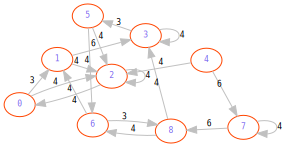

In [39]:
adjlShow(G , directed=True, weighted=True, layout="neato")

In [57]:
from os import path
import numpy as np

def jhonson(G):
  n = len(G)
  G.append([(n-1 , 0 )])
  print(G)
  _ , g = bellmanFord(G,n) 
  G.pop()
  Gprime = [[(v, w + g[u] - g[v]) for v , w in G[u]] for u in range(n)]
  
  paths = np.full((n,n),-1,dtype=int)
  for u in range(n):
    path,_ = dijkstra(Gprime,u)
    paths[u]=path 
  return paths


In [58]:
paths = jhonson(G) 




[[(1, 0)], [(2, 7), (17, 9)], [(1, 7), (3, 8), (18, 9)], [(2, 7), (4, 8)], [(3, 8), (5, 7), (19, 9)], [(4, 8), (6, 7), (20, 8)], [(5, 9), (7, 7)], [(6, 9), (8, 7), (23, 8)], [(7, 10), (9, 8), (23, 7)], [(8, 10), (10, 8), (25, 7)], [(9, 11), (11, 9)], [(10, 12), (12, 9), (43, 7)], [(11, 12), (13, 10), (45, 8)], [(12, 13), (14, 10), (49, 8)], [(13, 13), (15, 11), (52, 9)], [(14, 14), (53, 11), (157, 9)], [(55, 14), (157, 11)], [(1, 14), (18, 12), (26, 9)], [(2, 15), (17, 12), (19, 10)], [(4, 15), (18, 12), (20, 10)], [(5, 15), (19, 12), (21, 10)], [(20, 15), (22, 12), (31, 10)], [(6, 15), (21, 12), (23, 9)], [(7, 14), (8, 12), (22, 9), (24, 8)], [(22, 14), (40, 11)], [(9, 14), (24, 11), (41, 9)], [(17, 13), (28, 11), (30, 8)], [(33, 13), (35, 10)], [(26, 12), (59, 10)], [(28, 12), (30, 9), (63, 7)], [(19, 11), (29, 8), (31, 7)], [(21, 11), (30, 8), (33, 7)], [(29, 10), (30, 7)], [(34, 9), (35, 7)], [(22, 9), (39, 7)], [(27, 8), (65, 7), (165, 9)], [(64, 8), (166, 8)], [(36, 7), (67, 8)],

In [ ]:
adjlShow(G, path=paths[0],directed=True, weighted=True, layout="circo")